# Entrega final Data Science - Fundamentos para la ciencia de datos
Comisión: 60905

Alumna: Sabrina Benedetto

Fecha: Mayo 2024


# Sobre el Dataset


---
El dataset elegido se llama “Prediction of Churning Credit Card Customers” [(Fuente)](https://doi.org/10.5281/zenodo.4322342), obtenido del repositorio de  [Kaggle](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m).

## Objetivo
Predecir la cantidad de clientes que abandonará la relación comercial con la tarjeta de crédito (customer attrition) en base a la información disponible:

*  datos demográficos para identificar qué grupo demográfico es más plausible de abandonar la tarjeta

*  comportamiento de gasto del cliente hasta el momento del para predecir mejor la probabilidad de que un cliente abandone en el futuro
*  métricas de comportamiento de gasto a lo largo del tiempo para predecir los clientes potenciales más susceptibles de deserción en función de su puntuación de crédito, límite de crédito, ratio de utilización, etc.

En términos de gestión de la cartera, las variables del dataset permiten analizar los factores que influyen en la la cantidad de clientes que abandonan la relación comercial.

## Descripción del problema
El problema se aborda desde la siguiente pregunta:
¿Qué aspectos influyen en la cantidad de clientes que dejan de tener la tarjeta de crédito y abandonan la relación comercial?

## Variables del dataset

*   CLIENTNUM: Identificador único para cada cliente
*   Attrition_Flag: Bandera que indica si el cliente se ha dado de baja o no
*   Customer_Age: Edad del cliente
*   Gender: Sexo del cliente
*   Dependent_count: Número de dependientes que tiene el cliente
*   Education_Level: Nivel de estudios del cliente
*   Marital_Status: Estado civil del cliente
*   Income_Category: Categoría de ingresos del cliente
*   Card_Category: Tipo de tarjeta del cliente
*   Months_on_book: El tiempo que el cliente ha estado en el vínculo comercial
*   Total_Relationship_Count: Número total de relaciones que tiene el cliente con el proveedor de la tarjeta de crédito
*   Months_Inactive_12_mon: Número de meses que el cliente ha estado inactivo en los últimos doce meses
*  Contacts_Count_12_mon: Número de contactos que ha tenido el cliente en los últimos doce meses
*   Credit_Limit: Límite de crédito del cliente
*   Total_Revolving_Bal: Saldo consumido impago y refinanciado total (se traslada al mes siguiente - revolving)
*   Avg_Open_To_Buy: Ratio medio de "apertura a compra"  (OTB) del cliente (límite disponible). Equivale a (credit limit-revolving_balance)
*   Total_Amt_Chng_Q4_Q1: Cambio del importe total  del trimestre 4 respecto del trimestre 1
*   Total_Trans_Amt: Importe total de la transacción
*   Total_Trans_Ct: Número total de transacciones
*   Total_Ct_Chng_Q4_Q1: Cambio en el recuento total del trimestre 4 respecto del trimestre 1
*   Avg_Utilization_Ratio: Ratio medio de utilización del cliente. Equivale a: Total_Revolving_Bal / Credit_Limit
*   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_1: Indicador de Naive_Baayes para predecir si alguien se dará de baja o no en función de determinadas características




In [1]:
# Instalo las librerías
! pip install seaborn
! pip install pandas
!pip install --upgrade pandas
! pip install numpy
! pip install matplotlib
! pip install openpyxl
! pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [2]:
# Importo las librerías
import numpy as np   # importo la libreria numpy
import pandas as pd  # importo la libreria pandas
import matplotlib.pyplot as plt # importo la libreria de visualizacione matplot, en su extensión pyplot
import seaborn as sns
from openpyxl.workbook import Workbook # Importo la librería para exportar a excel

In [3]:
from google.colab import drive
drive.mount('/content/drive')   # Indico la carpeta donde ubicarse

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Data Science - Coderhouse/Pre-Entrega/BankChurners.csv',sep=',') # Leo el df y veo los 2 primeros registros
df.head(2)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


##Características del dataframe
El dataframe tiene 10127 filas y 23 columnas y no tiene valores nulos.


In [5]:
df.info()   # Obtengo información del Dataframe. No hay nulos. También lo podia ver con df.isnull().sum().sort_values(ascending=False).
            # si sólo queria cantidad de filas y columnas, usaba la función df.shape
# Renombro las últimas 2 columnas para facilitar el nombre y listo los nombres de las columnas para chequear
df = df.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "Naive_Bayes_1"})
df = df.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "Naive_Bayes_2"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

El dataset no presenta valores nulos.

In [6]:
# Convierto los datos que sea necesario
df = df.convert_dtypes(infer_objects=True)
df['Income_Category']=df['Income_Category'].astype('string')
df['Credit_Limit'] = df['Credit_Limit'].astype('float')
df['Avg_Open_To_Buy'] = df['Avg_Open_To_Buy'].astype('float')
df['Total_Amt_Chng_Q4_Q1'] = df['Total_Amt_Chng_Q4_Q1'].astype('float')
df['Total_Ct_Chng_Q4_Q1'] = df['Total_Ct_Chng_Q4_Q1'].astype('float')
df['Avg_Utilization_Ratio'] = df['Avg_Utilization_Ratio'].astype('float')
df['Naive_Bayes_1'] = df['Naive_Bayes_1'].astype('float')
df['Naive_Bayes_2'] = df['Naive_Bayes_2'].astype('float')
# Chequeo los tipos de datos
df.dtypes

CLIENTNUM                            Int64
Attrition_Flag              string[python]
Customer_Age                         Int64
Gender                      string[python]
Dependent_count                      Int64
Education_Level             string[python]
Marital_Status              string[python]
Income_Category             string[python]
Card_Category               string[python]
Months_on_book                       Int64
Total_Relationship_Count             Int64
Months_Inactive_12_mon               Int64
Contacts_Count_12_mon                Int64
Credit_Limit                       float64
Total_Revolving_Bal                  Int64
Avg_Open_To_Buy                    float64
Total_Amt_Chng_Q4_Q1               float64
Total_Trans_Amt                      Int64
Total_Trans_Ct                       Int64
Total_Ct_Chng_Q4_Q1                float64
Avg_Utilization_Ratio              float64
Naive_Bayes_1                      float64
Naive_Bayes_2                      float64
dtype: obje

In [7]:
# Obtengo las principales medidas del dataframe, presentando 2 decimales.
df.describe().round(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
count,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.00,10127.0,10127.00,10127.00,10127.0,10127.0,10127.00,10127.00,10127.00,10127.00
mean,739177606.33,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.84
std,36903783.45,8.02,1.3,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.37
min,708082083.0,26.0,0.0,13.0,1.0,0.0,0.0,1438.30,0.0,3.00,0.00,510.0,10.0,0.00,0.00,0.00,0.00
25%,713036770.5,41.0,1.0,31.0,3.0,2.0,2.0,2555.00,359.0,1324.50,0.63,2155.5,45.0,0.58,0.02,0.00,1.00
50%,717926358.0,46.0,2.0,36.0,4.0,2.0,2.0,4549.00,1276.0,3474.00,0.74,3899.0,67.0,0.70,0.18,0.00,1.00
75%,773143533.0,52.0,3.0,40.0,5.0,3.0,3.0,11067.50,1784.0,9859.00,0.86,4741.0,81.0,0.82,0.50,0.00,1.00
max,828343083.0,73.0,5.0,56.0,6.0,6.0,6.0,34516.00,2517.0,34516.00,3.40,18484.0,139.0,3.71,1.00,1.00,1.00


In [8]:
# Calculo la proporción de clientes no vigentes respecto del total de clientes
df.Attrition_Flag.unique()  # observo los posibles valores de las cadenas de texto en la columna "Attrition_Flag"
df.Attrition_Flag.value_counts() # cuento la cantidad de clientes vigentes y no vigentes
abandono_tot=df.Attrition_Flag.loc[df['Attrition_Flag']=='Attrited Customer'].count() # asigno a una variable la cantidad total de clientes no vigentes
abandono_tot_porc= ((abandono_tot / df.Attrition_Flag.count())*100).round(2)
print('Los clientes vigentes son:', df.Attrition_Flag.loc[df.Attrition_Flag=='Existing Customer'].count())
print('Los clientes no vigentes son:', abandono_tot)
print('Proporción de clientes no vigentes respecto del total:', abandono_tot_porc,'%')

Los clientes vigentes son: 8500
Los clientes no vigentes son: 1627
Proporción de clientes no vigentes respecto del total: 16.07 %


In [9]:
# Creo un nuevo df que sólo incluya los clientes no vigentes. Lo llamo df_1.
df_1=df.loc[df.Attrition_Flag=='Attrited Customer']
df_1.head(2)
df_1.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
count,1627.0,1627.0,1627.0,1627.0,1627.0,1627.0,1627.0,1627.000000,1627.0,1627.000000,1627.000000,1627.0,1627.0,1627.000000,1627.000000,1627.000000,1627.000000
mean,735261381.263675,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.93362,0.554386,0.162475,0.994909,0.005091
std,35577253.360484,7.665652,1.27501,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458,0.004303,0.004303
min,708083283.0,26.0,0.0,13.0,1.0,0.0,0.0,1438.300000,0.0,3.000000,0.000000,510.0,10.0,0.000000,0.000000,0.945910,0.000420
25%,712371258.0,41.0,2.0,32.0,2.0,2.0,2.0,2114.000000,0.0,1587.000000,0.544500,1903.5,37.0,0.400000,0.000000,0.994300,0.002825
50%,716564433.0,47.0,2.0,36.0,3.0,3.0,3.0,4178.000000,0.0,3488.000000,0.701000,2329.0,43.0,0.531000,0.000000,0.996310,0.003688
75%,768373683.0,52.0,3.0,40.0,5.0,3.0,4.0,9933.500000,1303.5,9257.500000,0.856000,2772.0,51.0,0.692000,0.231000,0.997170,0.005700
max,828294933.0,68.0,5.0,56.0,6.0,6.0,6.0,34516.000000,2517.0,34516.000000,1.492000,10583.0,94.0,2.500000,0.999000,0.999580,0.054090


# Primera parte. Análisis preliminar.
# Visualizaciones en Matplotlib y Seaborn.
## Determinación de insights preliminares.

Análisis por **género**

In [10]:
# Categorías de género y cantidad de registros para cada categoría
print('Las posibles categorías de género son:', df_1.Gender.value_counts())


Las posibles categorías de género son: Gender
F    930
M    697
Name: count, dtype: Int64


([<matplotlib.patches.Wedge at 0x790cf9d6aec0>,
 [Text(-0.24536467578085264, 1.0722854917786389, 'F'),
  Text(0.24536467578085203, -1.072285491778639, 'M')],
 [Text(-0.13383527769864687, 0.5848829955156212, '57.2%'),
  Text(0.13383527769864653, -0.5848829955156212, '42.8%')])

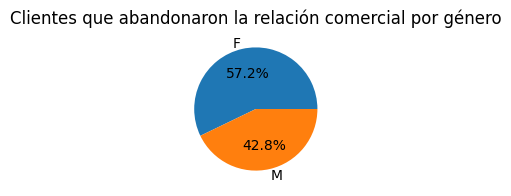

In [11]:
# Se realiza un pie chart con la participación porcentual de cada categoría de género en el grupo de clientes no vigentes

gender_label=df_1.Gender.unique()       # defino las etiquetas de género con la fn unique, que da las posibles cadenas de texto en la serie
gender_data=df_1.Gender.value_counts()  # defino los valores, es decir, la cantidad de clientes según el género
fig,ax = plt.subplots (figsize = (5, 2))
g1=ax.pie(gender_data, labels = gender_label,autopct="%0.1f%%") # Defino el pie chart, exponiendo los % de cada categoría
ax.set_title('Clientes que abandonaron la relación comercial por género')  # Le agrego el título
g1

Insight: de los clientes que se dieron de baja, el 57.2% fueron muejeres y el 42.8% hombres

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


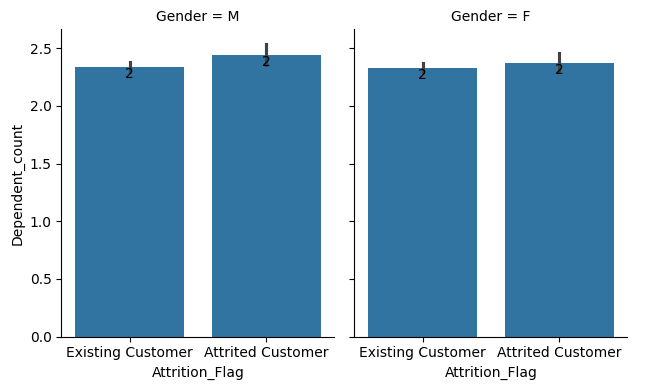

In [12]:
# Observo ambas categorías de clientes (vigentes y no vigentes) por género y cantidad de personas dependientes
g2=sns.catplot(data=df, x="Attrition_Flag", y='Dependent_count', col="Gender", kind="bar", height=4, aspect=.8,)
for ax in g2.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(),
                f'{p.get_height():1.0f}', ha='center', va='top')
g2

Insight: Los clientes no vigentes fueron  el 57.2% mujeres y 42.8% hombres.
No se observa un patrón en términos de la cantidad de dependientes por género, aunque levemente incide más en el género masculino que en el femenino a la hora de desvincularse de la tarjeta.

Análisis por **estado civil**

In [13]:
# Cantidad de clientes no vigentes por estado civil
df_1.Marital_Status.value_counts()

Marital_Status
Married     709
Single      668
Unknown     129
Divorced    121
Name: count, dtype: Int64

In [14]:
# Cantidad de clientes no vigentes por estado civil en %
tot_filas = len(df_1)
df_1.Marital_Status.value_counts()
part_porc_est_civil=(df_1.Marital_Status.value_counts()/tot_filas*100).round(2)
part_porc_est_civil

Marital_Status
Married     43.58
Single      41.06
Unknown      7.93
Divorced     7.44
Name: count, dtype: Float64

<ipython-input-15-f74cb0ccee29>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y_list[i], y_list[i], ha="center") # indico el texto centrado en las barras
<ipython-input-15-f74cb0ccee29>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y_list[i], y_list[i], ha="center", bbox= dict(facecolor = 'red', alpha =.8)) # indico el texto centrado en las barras en un recuadro (bbox)


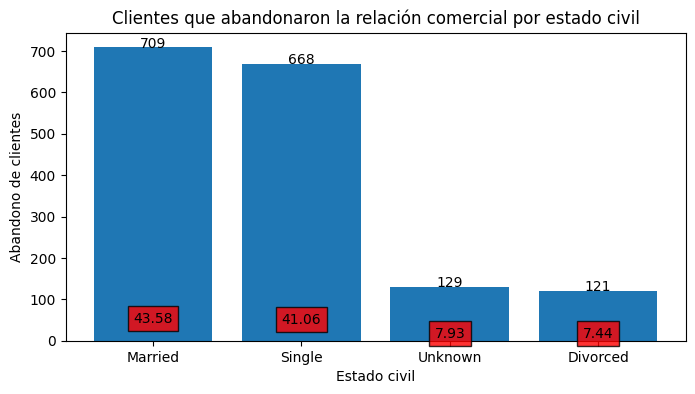

In [15]:
def add_value_label_ent(x_list, y_list):     # Defino que se agreguen las etiquetas de datos en las barras, centradas.
    for i in range(0, len(x_list)):      # se hace con un for para que recorra iterativamente las categorías asignadas al eje x
        plt.text(i, y_list[i], y_list[i], ha="center") # indico el texto centrado en las barras

def add_value_label_porc(x_list, y_list):     # Defino que se agreguen las etiquetas de datos en las barras, centradas.
    for i in range(0, len(x_list)):      # se hace con un for para que recorra iterativamente las categorías asignadas al eje x
        plt.text(i, y_list[i], y_list[i], ha="center", bbox= dict(facecolor = 'red', alpha =.8)) # indico el texto centrado en las barras en un recuadro (bbox)

est_civil_labels= df_1.Marital_Status.unique()  # defino los valores categóricos
est_civil_values = df_1.Marital_Status.value_counts() # defino que cuente los valores de cada categoría

fig, ax = plt.subplots(figsize=(8,4))     # defino el gráfico
g3=ax.bar(est_civil_labels, est_civil_values)

add_value_label_ent(est_civil_labels,est_civil_values)   # agrego etiquetas de valor con el recuento
add_value_label_porc(est_civil_labels,part_porc_est_civil) # agrego etiquetas con la participación %


ax.set_title('Clientes que abandonaron la relación comercial por estado civil')
ax.set_ylabel('Abandono de clientes')
ax.set_xlabel('Estado civil')
plt.show()

Insight: La mayoría de los clientes que abandonaron la relación comercial eran casados (43.58%) o solteros (41.06%), casi en la misma proporción. No se observa una diferencia importante en el aporte de cada uno de estos grupos al total.
El grupo de menor impacto es el de divorciados (7.44%), lo que permite inferir que conforma un grupo de clientes más fidelizado.  


In [16]:
abandono_acum = df_1.groupby(['Marital_Status'])
abandono_acum

Análisis por edad

In [17]:
# Calculo la mediana y el promedio de edad de los clientes vigentes y no vigentes
edad_median_vigente=df.Customer_Age.loc[df.Attrition_Flag=='Existing Customer'].median()
edad_median_no_vigente=df.Customer_Age.loc[df.Attrition_Flag=='Attrited Customer'].median()
edad_prom_vigente=df.Customer_Age.loc[df.Attrition_Flag=='Existing Customer'].mean()
edad_prom_no_vigente=df.Customer_Age.loc[df.Attrition_Flag=='Attrited Customer'].mean()
# Armo una tabla con las medianas y los promedios
tabla_med_prom_edad = pd.DataFrame({
    'Edad': ['Vigente', 'No vigente'],
    'Mediana': [edad_median_vigente, edad_median_no_vigente],
    'Promedio': [edad_prom_vigente, edad_prom_no_vigente]
})

print(tabla_med_prom_edad)

         Edad  Mediana   Promedio
0     Vigente     46.0  46.262118
1  No vigente     47.0  46.659496


La edad promedio de los clientes es de 46 años, siendo el cliente más joven en la base de 26 años y el mayor de 73 años. Con un desvío estándar de 8 años, la mayor parte de los clientes se concentra entre los 38 y 54 años  (esto sale del df.info()).
La mediana de edad de los clientes vigentes (46 años) es similar a la de los no vigentes (47 años).
Hay valores outliers en la población de clientes vigentes (superan los 70 años).
La similar distribución por edad se observa también en el gráfico de bigotes que sigue:

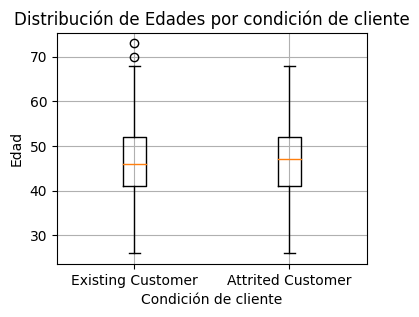

In [18]:
# Realizo un gráfico de caja y bigotes para evaluar la distribución de edades de los clientes vigentes y no vigentes.
import numpy as np

# Datos edades
edades_vigente= df.Customer_Age.loc[df.Attrition_Flag=='Existing Customer']
edades_no_vigente=df.Customer_Age.loc[df.Attrition_Flag=='Attrited Customer']

# Crear el gráfico de caja
plt.figure(figsize=(4, 3))
g4= plt.boxplot([edades_vigente, edades_no_vigente], labels=df.Attrition_Flag.unique())

# Añadir título y etiquetas de los ejes
plt.title('Distribución de Edades por condición de cliente')
plt.xlabel('Condición de cliente')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.grid(True)
plt.show()

A priori, no se puede detectar un patrón entre la edad y la decisión de desvincularse de la relación comercial.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


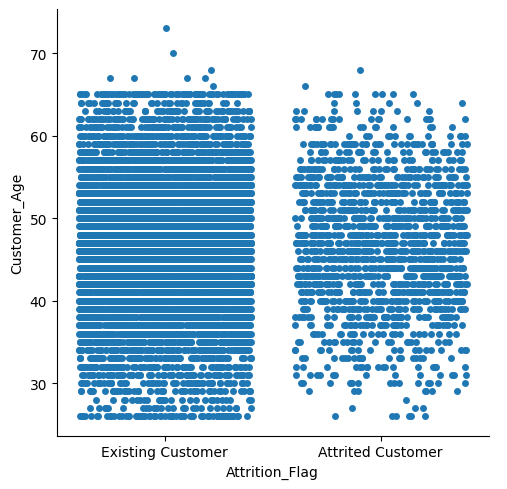

In [19]:
# Evalúo la concentración de cientes por edad, según tipo de cliente (vigente o no vigente)
import seaborn as sns
g5= sns.catplot(x = "Attrition_Flag", y = "Customer_Age", data = df, jitter = 0.4);

Se observa que la concentración es menor en las edades extremas para ambas categorías de clientes (vigentes y no vigentes), lo cual coincide con la estructura etaria de la población. No obstante, en el caso de los clientes que se dieron de baja, se observa una mayor concentración en el segmento de 40 a 55 años.

In [20]:
# Evalúo si la edad se relaciona con los saldos impagos
df['Total_Revolving_Bal'].max()
df['Total_Revolving_Bal'].min()
print('Valores extremos del saldo impago')
print('max=',df['Total_Revolving_Bal'].max())
print('min=',df['Total_Revolving_Bal'].min())

Valores extremos del saldo impago
max= 2517
min= 0


Text(0, 0.5, 'Edad')

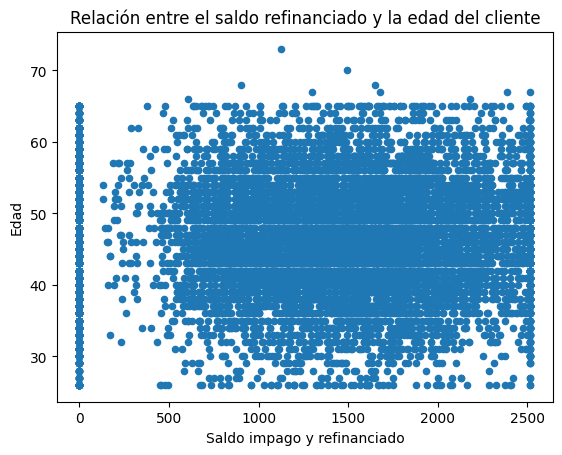

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g6= scatter = ax.scatter(df['Total_Revolving_Bal'], df['Customer_Age'], s=20)
ax.set_title('Relación entre el saldo refinanciado y la edad del cliente')
ax.set_xlabel('Saldo impago y refinanciado')
ax.set_ylabel('Edad')

De la gráfica de puntos no surge una relación entre el saldo impago y la edad de los clientes, por lo que la edad no sería un factor relevante en los saldos impagos.

Análisis por dependientes

In [22]:
df.Dependent_count.unique()

<IntegerArray>
[3, 5, 4, 2, 0, 1]
Length: 6, dtype: Int64

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Cantidad de clientes')

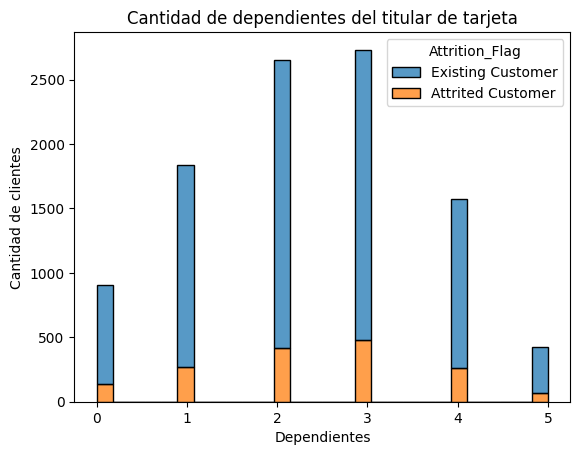

In [23]:
# Creo un histograma de frecuencias para determinar patrones entre la cantidad de dependientes y la condición de clientes
g7=sns.histplot(data=df, x="Dependent_count", hue="Attrition_Flag", multiple="stack")
plt.title ('Cantidad de dependientes del titular de tarjeta')
plt.xlabel('Dependientes')
plt.ylabel('Cantidad de clientes')

En ambos grupos (clientes vigentes y no vigentes), la cantidad de dependientes que se observa con mayor frecuencia es de 3 y 2 dependientes por titular de la tarjeta. Por tanto, la cantidad de dependientes no influiría directamente en la vigencia del cliente.

Análisis por tipo de tarjeta

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-24-91c812e21ffe>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-24-91c812e21ffe>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order_income)


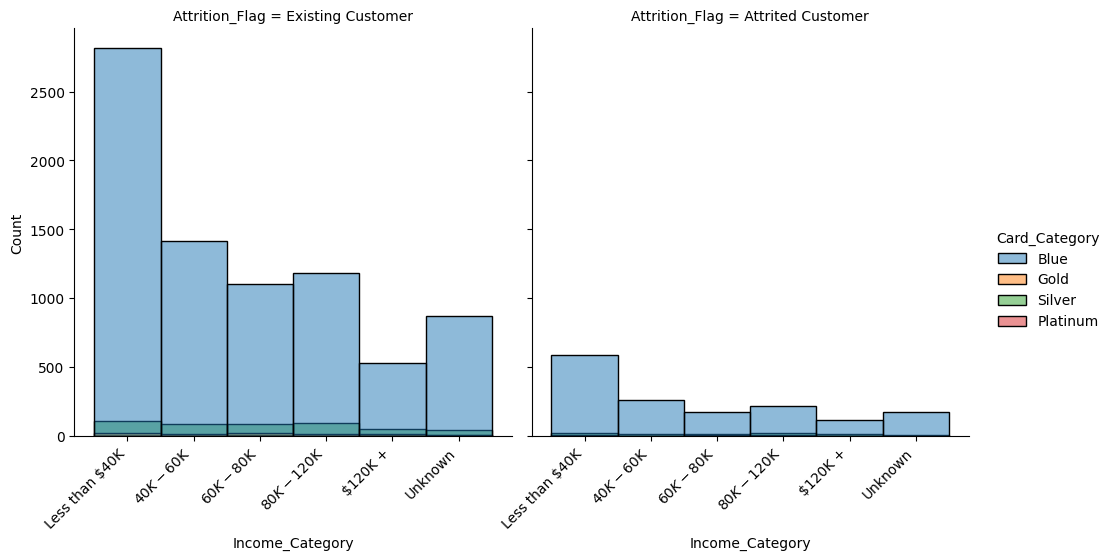

In [24]:
# Cantidad de tarjetas por categoría de ingresos

import seaborn as sns
# Defino el orden de las etiquetas del eje x (categorías de ingreso)
order_income = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

# Organizo los datos según el orden de 'Income_Category'
df['Income_Category'] = pd.Categorical(df['Income_Category'], categories=order_income, ordered=True)

# Armo el gráfico
g8=sns.displot(data=df, x="Income_Category", hue="Card_Category", col="Attrition_Flag")
for ax in g8.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for ax in g8.axes.flat:
    ax.set_xticklabels(order_income)


Insight: Para ambos tipos de clientes (vigentes y no vigentes), la categoría de tarjeta Blue es la de mayor frecuencia, seguida de la Silver.  
En ambos grupos, se replica la proporción de clientes para cada
categoría de ingresos, siendo la más importante la que de ingresos menores a $40k.
Asimismo, se observa que en los clientes no vigentes si bien predomina la categoría de tarjeta “Blue”, la participación de las tarjetas de mayor gama (gold, silver y platinum) es muy baja.



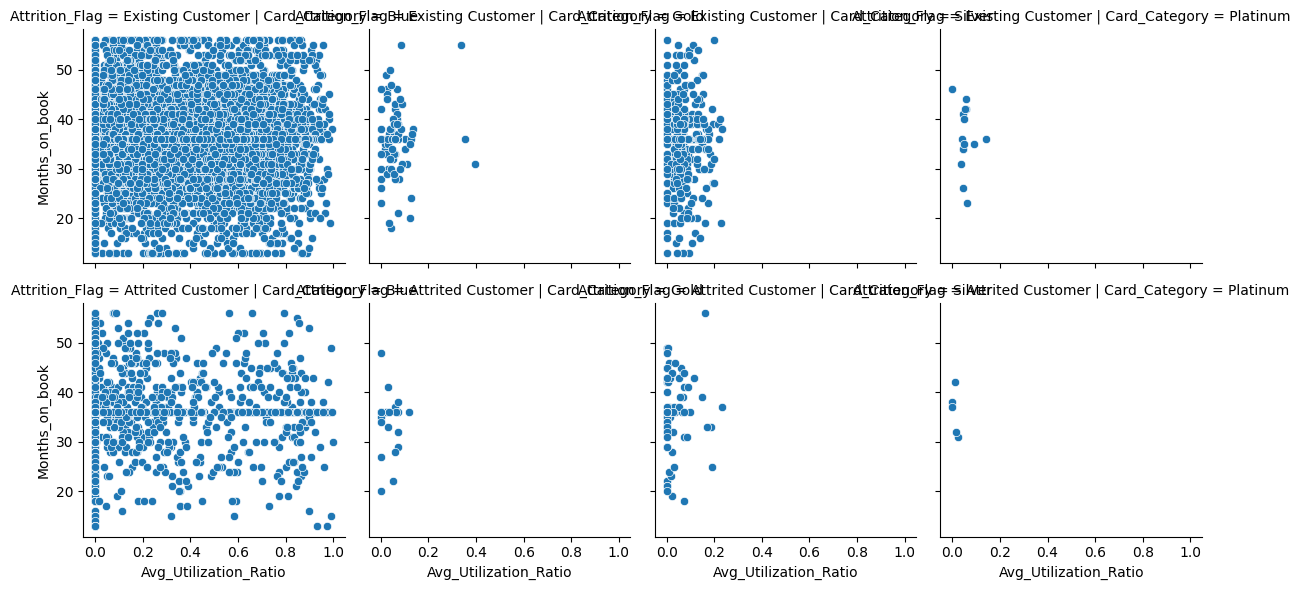

In [25]:
# Antiguedad y uso de la tarjeta por tipo de tarjeta

# FacetGrid
g9 = sns.FacetGrid(df, col="Card_Category", row="Attrition_Flag")
g9.map(sns.scatterplot, "Avg_Utilization_Ratio", "Months_on_book")
g9.set_axis_labels('Avg_Utilization_Ratio', 'Months_on_book', fontsize=10)
# Ajustar el tamaño del texto de los valores en los ejes x e y

# No logré cambiar el tamaño de la letra de las etiquetas de columnas y filas para visualizar mejor.
# Probé con g9.set_titles(col_template="{Card_Category}", row_template="{Attrition_Flag}", fontsize=8), pero me da error!

No se observa a priori una relación entre el ratio medio de uso de la tarjeta (uso de saldo  límite de saldo) y la antiguedad (en meses) de los clientes, ni por tipo de tarjeta ni por tipo de cliente.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

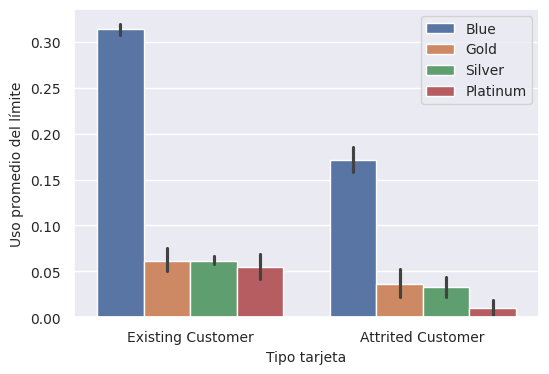

In [26]:
# Uso de la tarjeta por tipo de tarjeta
sns.set(rc={'figure.figsize':(6, 4)})  # Puedes ajustar el ancho (width) y la altura (height) según tus necesidades
g10= sns.barplot (x='Attrition_Flag', y='Avg_Utilization_Ratio', hue="Card_Category",data=df)
plt.xlabel('Tipo tarjeta', fontsize=10)
plt.ylabel('Uso promedio del límite', fontsize=10)
plt.legend(fontsize=10)
# Ajusto el tamaño del texto de los valores en los ejes x e y
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

El uso promedio del límite (límite de consumo menos saldo consumido) más alto, en ambos grupos de clientes (vigentes y no vigentes), se da en la tarjeta "blue" (la mayoritaria). En el caso de los clientes no vigentes, el uso promedio del límite fue menor en todas las categorías de tarjeta. Esto permite inferir que los clientes que dieron de baja la tarjeta no la utilizaban a su máximo potencial.A partir de esto, no habría una relación entre el uso promedio del límite y la desvinculación de la tarjeta.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


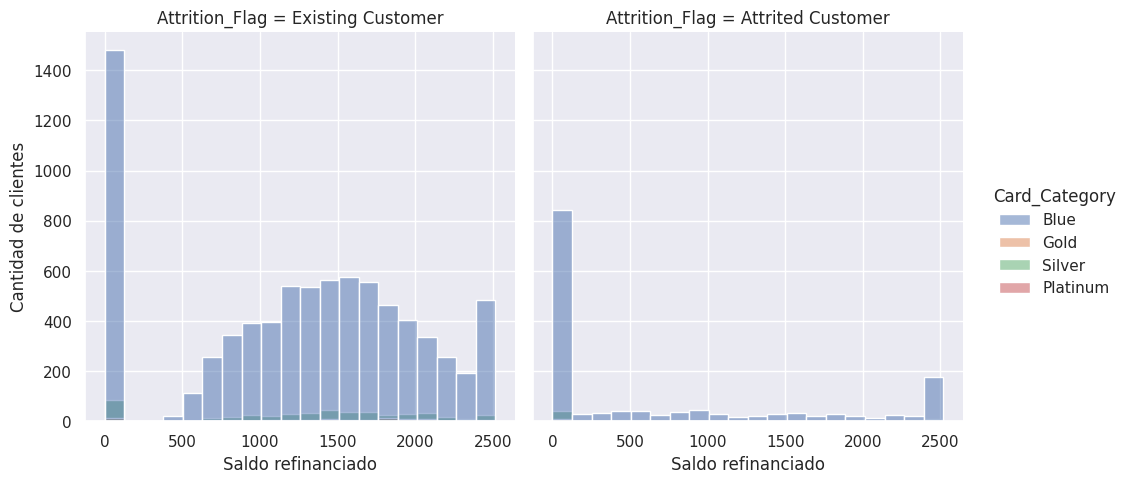

In [27]:
# Saldos refinanciados por monto, cantidad de clientes y tipo de tarjeta

g11=sns.displot(data=df, x="Total_Revolving_Bal", hue="Card_Category", col="Attrition_Flag")
g11.set_axis_labels("Saldo refinanciado","Cantidad de clientes", )

In [28]:
refin_prom=df.Total_Revolving_Bal.mean()
refin_prom_vigente=df.Total_Revolving_Bal.loc[df.Attrition_Flag=='Existing Customer'].mean()
refin_prom_no_vigente=df.Total_Revolving_Bal.loc[df.Attrition_Flag=='Attrited Customer'].mean()
print('Saldo promedio refinanciado total clientes=', refin_prom.round(2), '$')
print('Saldo promedio refinanciado clientes vigentes=', refin_prom_vigente.round(2), '$')
print('Saldo promedio refinanciado clientes no vigentes=', refin_prom_no_vigente.round(2), '$')

Saldo promedio refinanciado total clientes= 1162.81 $
Saldo promedio refinanciado clientes vigentes= 1256.6 $
Saldo promedio refinanciado clientes no vigentes= 672.82 $


En ambas categorías de clientes (vigentes y no vigentes), predominan los clientes con saldos refinanciados bajos (menores a 500$) para los tipos de tarjetas más frecuentes (Blue y Silver). Esto es deseable, ya que da cuenta de que la cartera de clientes no muestra una alta dependencia del crédito.
Por otro lado, los clientes vigentes muestran un saldo refinanciado promedio mayor al de los no vigentes.
Esto, analizado en conjunto con el análisis del gráfico 10 (donde se observó que los clientes no vigentes usaban la tarjeta menos que su limite potencial), permite deducir que que los clientes que se desvincularon de la relación comercial no representaban clientes representativos en cuanto al consumo y uso de la tarjeta.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

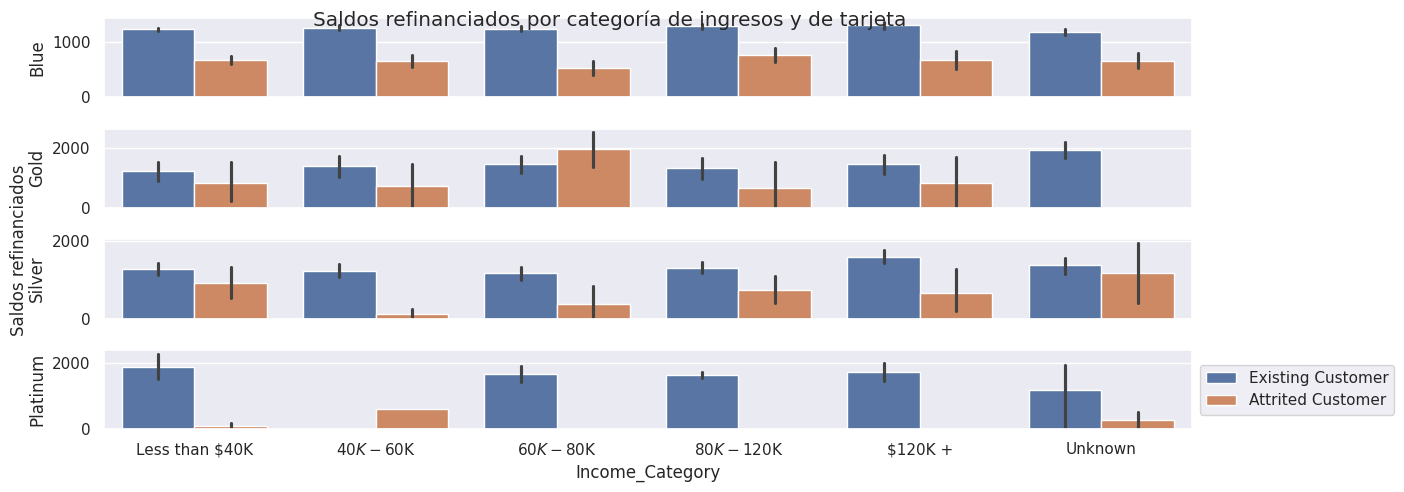

In [29]:
# Saldos refinanciados por categoría de ingresos y de tarjeta
import matplotlib.pyplot as plt
import seaborn as sns
# Defino una variable de consumo por tipo de tarjeta
rev_bal_blue=df[df.Card_Category=='Blue']['Total_Revolving_Bal']
rev_bal_gold=df[df.Card_Category=='Gold']['Total_Revolving_Bal']
rev_bal_silver=df[df.Card_Category=='Silver']['Total_Revolving_Bal']
rev_bal_platinum=df[df.Card_Category=='Platinum']['Total_Revolving_Bal']

# Defino un objeto ax con 4 filas y una sola columna
g12=fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 5), sharex=True)
sg12_1=sns.barplot(x="Income_Category", y=rev_bal_blue, hue="Attrition_Flag",data=df, ax=axs[0], legend=True)  # Solo agrego la legend en 1 de las filas (sino, la repite)
sg12_2=sns.barplot(x="Income_Category", y=rev_bal_gold, hue="Attrition_Flag",data=df, ax=axs[1], legend=False)
sg12_3=sns.barplot(x="Income_Category", y=rev_bal_silver, hue="Attrition_Flag",data=df, ax=axs[2], legend=False)
sg12_4=sns.barplot(x="Income_Category", y=rev_bal_platinum, hue="Attrition_Flag",data=df, ax=axs[3], legend=False)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Agrego etiqueta eje x
plt.suptitle('Saldos refinanciados por categoría de ingresos y de tarjeta')

# Agregar etiqueta al eje y para todos los subgráficos
fig.text(0, 0.5, 'Saldos refinanciados', va='center', rotation='vertical')
axs[0].set_ylabel('Blue')
axs[1].set_ylabel('Gold')
axs[2].set_ylabel('Silver')
axs[3].set_ylabel('Platinum')

# Eliminar la leyenda automática del primer subgráfico
axs[0].get_legend().remove()

# Agrego una única leyenda para todo el gráfico
handles, labels = sg12_1.get_legend_handles_labels()

# Extraer leyendas de un subgráfico donde sí hay leyenda
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

> *Clientes vigentes*

En el caso de la tarjeta Blue (la mayoritaria), los saldos refinanciados de los clientes vigentes muestran valores similares para todas las categorías de ingresos, por lo que el ingreso no sería un factor relevante a la hora de definir si mayor ingreso genera menor necesidad de refinanciamiento del cliente. En el caso de la Silver (la segunda en importancia en cantidad de tarjetas emitidas), sí se observa un mayor saldo refinanciado en los ingresos mayores a $120k. Por el lado de la Platinum, se observan mayores saldos refinanciados en la categoria de ingresos más baja.


> *Clientes no vigentes*

En el caso de los clientes no vigentes, se destacan los saldos refinanciados en la categoria de ingresos medios (60k -80k) en la tarjeta Gold. Esto define un segmento de clientes a analizar a la hora de decidir reicorporarlos, ya que el mayor monto refinanciado afecta negativamente el scoring del cliente. Además, mayor refinanciamiento genera intereses, lo cual puede afectar la solvencia del cliente.




## Determinación de outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(8.125000000000002, 0.5, 'Monto total de transacción')

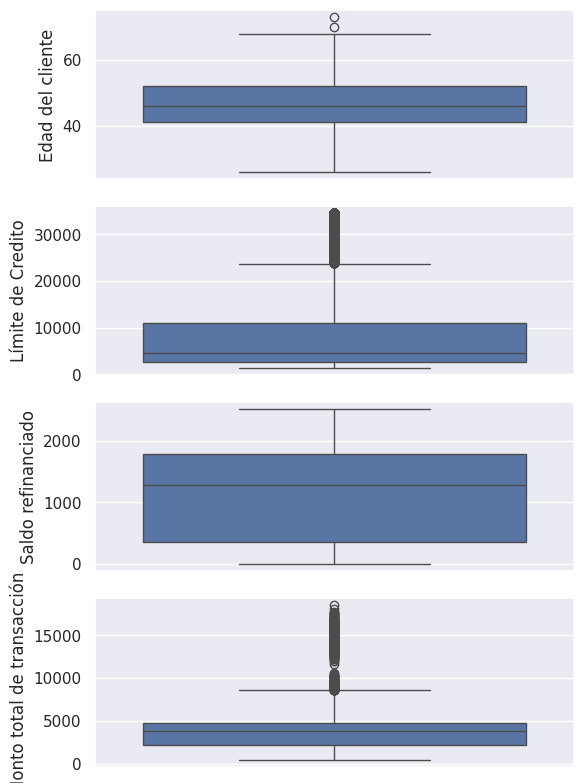

In [30]:
# Defino un objeto ax con 4 filas para evaluar 4 features al mismo tiempo
g13=fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(6, 8), sharex=True)
sns.boxplot(df["Customer_Age"], ax=axs[0])
sns.boxplot(df["Credit_Limit"], ax=axs[1])
sns.boxplot(df["Total_Revolving_Bal"], ax=axs[2])
sns.boxplot(df["Total_Trans_Amt"], ax=axs[3])

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
# Añadir etiquetas a los ejes
axs[0].set_ylabel("Edad del cliente")
axs[1].set_ylabel("Límite de Credito")
axs[2].set_ylabel("Saldo refinanciado")
axs[3].set_ylabel("Monto total de transacción")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

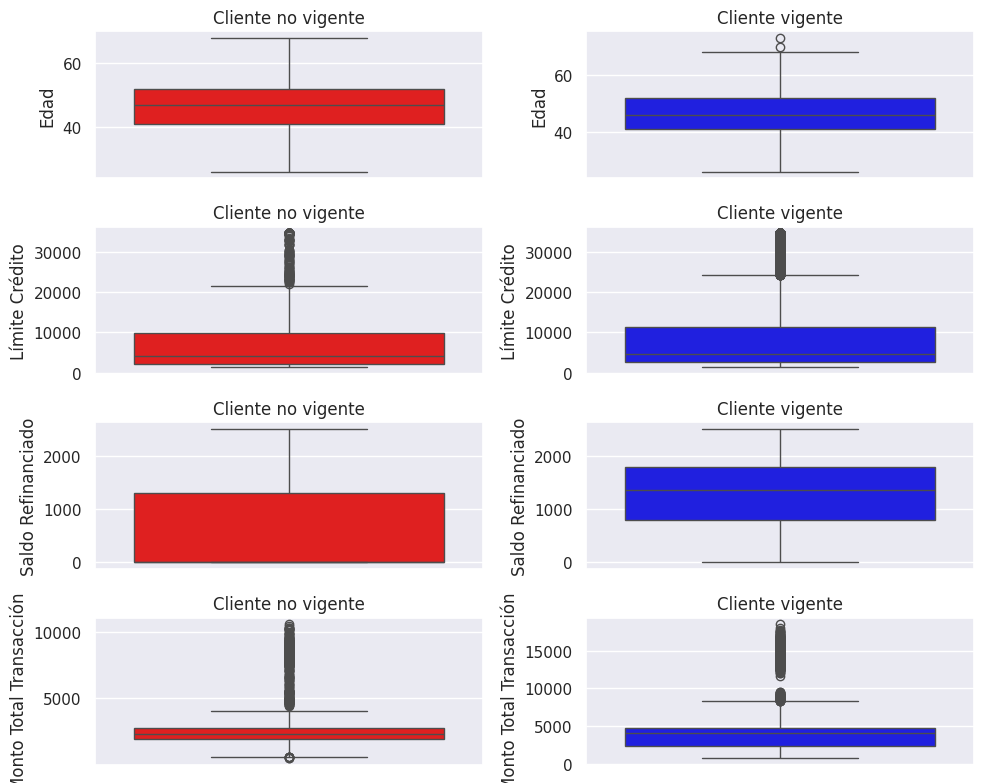

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defino un objeto ax con 4 filas y 2 columnas
g14=fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 8), sharex=True)

# Divido el df agrupando por tipo de cliente (vigente y no vigente)
grouped = df.groupby('Attrition_Flag')

# Defino las variables a graficar
variables = ["Customer_Age", "Credit_Limit", "Total_Revolving_Bal", "Total_Trans_Amt"]

# Itero sobre cada grupo y cada variable para crear los boxplots
for i, (key, group) in enumerate(grouped):    # enumerate para tener índices tanto para los grupos como para las variables.
    for j, var in enumerate(variables):
        sns.boxplot(group[var], ax=axs[j, i], color='red' if key == 'Attrited Customer' else 'blue')

       # Agrego título a cada columna
        axs[j, i].set_title('Cliente no vigente' if key == 'Attrited Customer' else 'Cliente vigente')

        # Cambio títulos a los ejes y
        axs[j, i].set_ylabel(var.replace('Customer_Age', 'Edad').replace('Credit_Limit', 'Límite crédito').replace('Total_Revolving_Bal', 'Saldo refinanciado').replace('Total_Trans_Amt', 'Monto total transacción').title())

# Ajusto el espacio entre los subgráficos
plt.tight_layout()
plt.show()

Se observa una importante cantidad de outliers en el límite de crédito y en el monto total de transacción, tanto en la población total, como en las subcategorías de clientes.

In [32]:
# Defino un dataframe con los outliers para identificar los registros

# 1) Defino el rango intercoartil (IQR)
Q1_credit=df["Credit_Limit"].quantile(0.25)
Q3_credit=df["Credit_Limit"].quantile(0.75)

Q1_tot_amt=df["Total_Trans_Amt"].quantile(0.25)
Q3_tot_amt=df["Total_Trans_Amt"].quantile(0.75)

Q1_revolving=df["Total_Revolving_Bal"].quantile(0.25)
Q3_revolving=df["Total_Revolving_Bal"].quantile(0.75)

IQR_credit= Q3_credit-Q1_credit
IQR_tot_amt= Q3_tot_amt-Q1_tot_amt
IQR_revolving= Q3_revolving-Q1_revolving

# 2) Calculo los límites
lim_inf_credit= Q1_credit - 1.5 *IQR_credit
lim_sup_credit= Q3_credit +1.5 *IQR_credit

lim_inf_tot_amt= Q1_tot_amt - 1.5 *IQR_tot_amt
lim_sup_tot_amt= Q3_tot_amt + 1.5 *IQR_tot_amt

lim_inf_revolving= Q1_revolving - 1.5 * IQR_revolving
lim_sup_revolving= Q3_revolving + 1.5* IQR_revolving

# 3) Armo el dataframe
df_outliers= df[
    ((df["Total_Trans_Amt"]<lim_inf_tot_amt) | (df["Total_Trans_Amt"]>lim_sup_tot_amt)) |
    ((df["Credit_Limit"]<lim_inf_credit) | (df["Credit_Limit"]>lim_sup_credit)) |
    ((df["Total_Revolving_Bal"]<lim_inf_revolving) | (df["Total_Revolving_Bal"]>lim_sup_revolving))
    ]
df_outliers.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991


In [33]:
df_outliers.shape

(1684, 23)

In [34]:
lim_inf_revolving

-1778.5

In [35]:
lim_sup_revolving

3921.5

In [36]:
outliers_vigentes=df_outliers.CLIENTNUM.loc[df_outliers.Attrition_Flag=='Existing Customer'].count()
outliers_no_vigentes=df_outliers.CLIENTNUM.loc[df_outliers.Attrition_Flag=='Attrited Customer'].count()
print('Outliers en clientes vigentes=',outliers_vigentes )
print('Outliers en clientes no vigentes=', outliers_no_vigentes)
print('% de outliers de clientes no vigentes sobre el total de outliers:', ((outliers_no_vigentes/(outliers_no_vigentes+outliers_vigentes))*100).round(2), '%')
print('% de outliers de clientes no vigentes respecto del total de outliers en clientes vigentes:', ((outliers_no_vigentes/outliers_vigentes)*100).round(2), '%')

Outliers en clientes vigentes= 1458
Outliers en clientes no vigentes= 226
% de outliers de clientes no vigentes sobre el total de outliers: 13.42 %
% de outliers de clientes no vigentes respecto del total de outliers en clientes vigentes: 15.5 %


In [37]:
# Defino un dataframe eliminando los outliers identificados
import pandas as pd
from scipy import stats
# Identifico los índices de las filas que son outliers en el DataFrame original
outliers_indices = df_outliers.index
# Elimino las filas correspondientes a los outliers del df original
df_sin_outliers = df.drop(outliers_indices)
print('df con outliers shape:', df.shape)
print('df SIN outliers shape:', df_sin_outliers.shape)

df con outliers shape: (10127, 23)
df SIN outliers shape: (8443, 23)


# Segunda parte. Análisis predictivo

## Tratamiento del dataset y ejecución de modelo predictivo.

## Estadistica descriptiva aplicada

## T-test

Se calculan los análisis t-test al dataset original

In [38]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_1', 'Naive_Bayes_2'],
      dtype='object')

In [39]:
# Traigo los valores promedio de saldos refinanciados calculados más arriba
print('Saldo promedio refinanciado total clientes=', refin_prom.round(2), '$')
print('Saldo promedio refinanciado clientes vigentes=', refin_prom_vigente.round(2), '$')
print('Saldo promedio refinanciado clientes no vigentes=', refin_prom_no_vigente.round(2), '$')

Saldo promedio refinanciado total clientes= 1162.81 $
Saldo promedio refinanciado clientes vigentes= 1256.6 $
Saldo promedio refinanciado clientes no vigentes= 672.82 $


In [40]:
df['Total_Revolving_Bal'] = pd.to_numeric(df['Total_Revolving_Bal'], errors='coerce')

In [41]:
type(refin_prom)

numpy.float64

In [42]:
type(df.Total_Revolving_Bal)

pandas.core.series.Series

In [43]:
# Hago un test de hipotesis para evaluar el saldo impago y refinanciado promedio de los clientes no vigentes respecto del total.
# Objetivo: ver si los saldos impagos refinanciados de los clientes no vigentes son mayores en promedio al de la población total.

# Uso la fn scipy.stats.mstats.ttest_1samp. Para ver los parámetros: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_1samp.html#scipy.stats.mstats.ttest_1samp

# H0) el saldo impago refinanciado promedio de los clientes no vigentes es mayor al del total de clientes

# Importo el módulo stats de la libreria de funciones estadísticas scipy.
import scipy.stats as stats
df['Total_Revolving_Bal'] = df['Total_Revolving_Bal'].astype(str).astype(float)  # Convierto el dato a string y a float xq sino da error " “data type not inexact”"
# Aplico la fn Ttest_1samp= función de stats que calcula el T-test para el promedio de UN grupo de datos
stats.ttest_1samp(df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Total_Revolving_Bal'], popmean=refin_prom, axis=0, alternative='greater')  # Uso greater xq quiero ver si es mayor

TtestResult(statistic=-21.45065378809112, pvalue=1.0, df=1626)

Dado que el *p value* es > 0,05 --> NO RECHAZO H0) --> no hay suficiente evidencia para rechazar la hipótesis nula --> el saldo impago refinanciado promedio de los clientes no vigentes no es mayor al del total de clientes (vigentes y no vigentes). **ESTO NO SERÍA COHERENTE**: xq el saldo promedio refinanciado total clientes= 1162.8 es > al saldo promedio refinanciado clientes no vigentes= 672.82

In [44]:
# Ahora hago un t test para evaluar el si los saldos impagos refinanciados de los clientes no vigentes difieren significativamente de los saldos impagos de los clientes vigentes
# Uso la función scipy.stats.ttest_ind que calcula los t-test para los promedios de 2 muestras independientes

# H0) los saldos impagos y refinanciados de los clientes vigentes  y no vigentes tienen identicos valores promedio (esperados).

saldo_imp_refin_no_vig= df[df.Attrition_Flag=="Attrited Customer"].Total_Revolving_Bal
saldo_imp_refin_vig= df[df.Attrition_Flag=="Existing Customer"].Total_Revolving_Bal
df['Total_Revolving_Bal'] = df['Total_Revolving_Bal'].astype(str).astype(float) # Convierto el dato a string y a float xq sino da error " “data type not inexact”"
statistic, pvalue = stats.ttest_ind(saldo_imp_refin_no_vig,saldo_imp_refin_vig, equal_var=True)
print('Estadistico:',round(statistic,2),'p-valor:', round(pvalue,4))

Estadistico: -27.44 p-valor: 0.0


Dado que el p-value es < 0.05, RECHAZO la H0) --> Los saldos promedios impagos y refinanciados de los clientes vigentes y no vigentes difieren (de hecho, el de los clientes no vigentes es menor al de los vigentes y al del total de la población).

In [45]:
# T-TEST con Months_on_book (tiempo que el cliente ha estado en el vínculo comercial (mob))
mob_prom=df.Months_on_book.mean()
mob_vig_prom=df.loc[df.Attrition_Flag=='Existing Customer'].Months_on_book.mean()
mob_no_vig_prom=df.loc[df.Attrition_Flag=='Attrited Customer'].Months_on_book.mean()
print("Antiguedad promedio total clientes=",mob_prom.round(2), ' meses')
print("Antiguedad promedio en clientes vigentes=",mob_vig_prom.round(2), ' meses')
print("Antiguedad promedio en clientes no vigentes=",mob_no_vig_prom.round(2), ' meses')

Antiguedad promedio total clientes= 35.93  meses
Antiguedad promedio en clientes vigentes= 35.88  meses
Antiguedad promedio en clientes no vigentes= 36.18  meses


In [46]:
# Uso la fn scipy.stats.mstats.ttest_1samp. Para ver los parámetros: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_1samp.html#scipy.stats.mstats.ttest_1samp

# H0) la antiguedad promedio de los clientes no vigentes es mayor a la del total de clientes

# Importo el módulo stats de la libreria de funciones estadísticas scipy.
import scipy.stats as stats
df['Months_on_book'] = df['Months_on_book'].astype(str).astype(float)  # Convierto el dato a string y a float xq sino da error " “data type not inexact”"
# Aplico la fn T-test_1samp= función de stats que calcula el T-test para el promedio de UN grupo de datos
stats.ttest_1samp(df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Months_on_book'], popmean=mob_prom, axis=0, alternative='greater')  # Uso greater xq quiero ver si es mayor


TtestResult(statistic=1.2925314710147329, pvalue=0.09817839799391208, df=1626)

El p value es > 0,05, por lo que NO se rechaza la H0 --> No hay suficiente evidencia para rechazar la hipótesis nula --> No se puede decir que el promedio de antiguedad de los clientes no vigentes sea mayor al de la población. **Esto no es coherente** xq la antiguedad promedio total clientes (35.93 meses) es < a la antiguedad promedio en clientes no vigentes (36.18 meses)

## Tratamiento de variables categóricas

El dataset cuenta con variabels categóricas, las que serán convertidas a numéricas con los métodos disponibles en la librería sklearn


In [47]:
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,12691.0,777.0,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,8256.0,864.0,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [48]:
# Chequeo el tipo de datos del dataset
df.dtypes

CLIENTNUM                            Int64
Attrition_Flag              string[python]
Customer_Age                         Int64
Gender                      string[python]
Dependent_count                      Int64
Education_Level             string[python]
Marital_Status              string[python]
Income_Category                   category
Card_Category               string[python]
Months_on_book                     float64
Total_Relationship_Count             Int64
Months_Inactive_12_mon               Int64
Contacts_Count_12_mon                Int64
Credit_Limit                       float64
Total_Revolving_Bal                float64
Avg_Open_To_Buy                    float64
Total_Amt_Chng_Q4_Q1               float64
Total_Trans_Amt                      Int64
Total_Trans_Ct                       Int64
Total_Ct_Chng_Q4_Q1                float64
Avg_Utilization_Ratio              float64
Naive_Bayes_1                      float64
Naive_Bayes_2                      float64
dtype: obje

Opcion 1) Creo un dataset con variables categoricas, diferenciando las ordinales (aplicando label enocoder) de las no ordinales (aplicando one hot encoder)

In [49]:
# Creo una copia del dataframe original para transformar las variables categoricas a numericas
df_categoric=df.copy()
# Se excluyen las variables que no se evaluarán:
	# CLIENTNUM: El numero de cliente es una variable de alta cardinalidad y no aporta a la predicción
	# Naive_Bayes_1 (2): Indicadores que predicen si un cliente se dará de baja o no en función de determinadas características, las cuales se evaluarán por separado en el modelo.
df_categoric = df_categoric.drop(['CLIENTNUM', 'Naive_Bayes_1','Naive_Bayes_2'], axis=1)

In [50]:
df_categoric.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [51]:
# Covierto las columnas de tipo 'string' a 'object' (para que el codigo de reconocer columnas categóricas funcione. Si las dejo como string, me da error)
df_categoric = df_categoric.astype({'Attrition_Flag': 'object',
                'Gender': 'object',
                'Education_Level': 'object',
                'Marital_Status': 'object',
                'Income_Category': 'object',
                'Card_Category': 'object'})

# Selecciono las columnas cuyo tipo de datos es 'object' o 'category'
categorical_columns = df_categoric.select_dtypes(include=['object']).columns.tolist()
print('Columnas categóricas del dataset:', categorical_columns)

Columnas categóricas del dataset: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [52]:
# Chequeo los tipos de datos
df_categoric.dtypes

Attrition_Flag               object
Customer_Age                  Int64
Gender                       object
Dependent_count               Int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book              float64
Total_Relationship_Count      Int64
Months_Inactive_12_mon        Int64
Contacts_Count_12_mon         Int64
Credit_Limit                float64
Total_Revolving_Bal         float64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               Int64
Total_Trans_Ct                Int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [53]:
# Convierto las variables categóricas ORDINALES (Education_Level, Marital_Status, Card_Category) en numéricas con LABEL ENCODER
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_categoric['Education_Level']= label_encoder.fit_transform(df_categoric['Education_Level']).astype(int)
df_categoric['Card_Category']= label_encoder.fit_transform(df_categoric['Card_Category']).astype(int)
df_categoric['Marital_Status']= label_encoder.fit_transform(df_categoric['Marital_Status']).astype(int)
df_categoric['Income_Category']= label_encoder.fit_transform(df_categoric['Income_Category']).astype(int)
df_categoric.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,3,1,2,0,39.0,5,1,3,12691.0,777.0,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,2,2,4,0,44.0,6,1,2,8256.0,864.0,7392.0,1.541,1291,33,3.714,0.105


In [54]:
# Convierto las variables categóricas NO ORDINALES (Attrition_Flag, Gender) en numéricas
# Uso ONE HOT ENCODER
df_categoric=(pd.get_dummies(df_categoric, columns=['Attrition_Flag', 'Gender'])).astype(int)  # Aclaro que sea numerica para que no de boolean T/F
df_categoric.head(2)

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Gender_F,Gender_M
0,45,3,3,1,2,0,39,5,1,3,...,11914,1,1144,42,1,0,0,1,0,1
1,49,5,2,2,4,0,44,6,1,2,...,7392,1,1291,33,3,0,0,1,1,0


In [55]:
print('Cant columnas del df original: ', df.shape)
print('Cant columnas del df_categoric: ', df_categoric.shape)
print('elimina las 3 columnas indicadas (clientum y los indicadores Naive_Bayes, agrega 4 columnas (por las variables dummies que agrega) y saca las 2 columnas que transformó en dummies')

Cant columnas del df original:  (10127, 23)
Cant columnas del df_categoric:  (10127, 22)
elimina las 3 columnas indicadas (clientum y los indicadores Naive_Bayes, agrega 4 columnas (por las variables dummies que agrega) y saca las 2 columnas que transformó en dummies


Opcion 2) Creo un dataset con variables categoricas aplicando **label enocoder** a todas las variables

In [56]:
import pandas as pd
# Creo una copia del dataframe original para transformar las variables categoricas a numericas
df_categoric_1=df.copy()
# Se excluyen las variables que no se evaluarán:
	# CLIENTNUM: El numero de cliente es una variable de alta cardinalidad y no aporta a la predicción
	# Naive_Bayes_1 (2): Indicadores que predicen si un cliente se dará de baja o no en función de determinadas características, las cuales se evaluarán por separado en el modelo.
df_categoric_1 = df_categoric_1.drop(['CLIENTNUM', 'Naive_Bayes_1','Naive_Bayes_2'], axis=1)
# Convierto las variables categóricas en numéricas con LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_categoric_1['Education_Level']= label_encoder.fit_transform(df_categoric_1['Education_Level']).astype(int)
df_categoric_1['Card_Category']= label_encoder.fit_transform(df_categoric_1['Card_Category']).astype(int)
df_categoric_1['Marital_Status']= label_encoder.fit_transform(df_categoric_1['Marital_Status']).astype(int)
df_categoric_1['Income_Category']= label_encoder.fit_transform(df_categoric_1['Income_Category']).astype(int)
df_categoric_1['Attrition_Flag']= label_encoder.fit_transform(df_categoric_1['Attrition_Flag']).astype(int)
df_categoric_1['Gender']= label_encoder.fit_transform(df_categoric_1['Gender']).astype(int)

df_categoric_1.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39.0,5,1,3,12691.0,777.0,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44.0,6,1,2,8256.0,864.0,7392.0,1.541,1291,33,3.714,0.105


Attrition flag:
0 --> Attrieted customer
1 --> Existing customer
                

# Reducción de la dimensionalidad
## Principal Component Analysis (PCA)

In [57]:
# Trabajo sobre el df_categoric_1 que transformo las variables categoricas con label_encoder
# Primero estandarizo las variables numéricas xq el PCA es sensible a las escalas.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_escalado = scaler.fit_transform(df_categoric_1)  # el df esta hecho sobre el df_categoric, por lo que escala con las variables ya transformadas a numericas
df_escalado.shape

(10127, 20)

In [58]:
# Aplicar el PCA al df que tiene las variables categóricas transformadas a numéricas y escalado
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=0.95)  # Aplico el PCA manteniendo el 95% de la varianza explicada
pca.fit(df_escalado)          # Entreno
pca_data = pca.transform(df_escalado)

In [59]:
PC_components = np.arange(pca.n_components_) + 1
PC_components
print('PC:', PC_components)
print('Cantidad de componentes principales (PC) que arroja el método:', len(PC_components))

PC: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Cantidad de componentes principales (PC) que arroja el método: 15


In [60]:
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(pca.explained_variance_ratio_)

Porcentaje de varianza explicada por cada componente
[0.1558432  0.11497033 0.09075808 0.0848604  0.06559919 0.05932595
 0.05257712 0.05098808 0.04982215 0.04903893 0.04653094 0.04380004
 0.0322129  0.03031867 0.02494835]


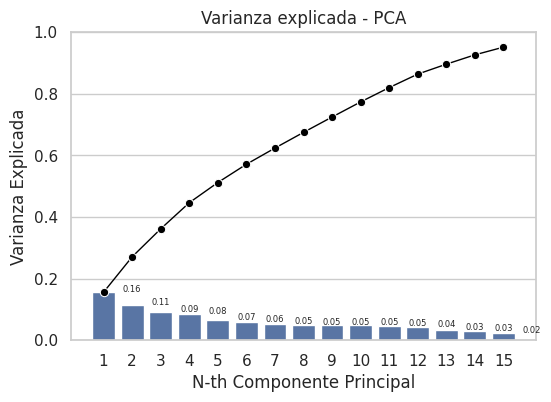

In [61]:
# Grafico las varianzas explicadas por cada componente principal obtenido (PC)
g_pca = sns.set(style='whitegrid', font_scale=1)
fig, ax = plt.subplots(figsize=(6, 4))
g_pca = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
g_pca = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=1, marker='o', markersize=6)

for x, y in zip(np.arange(len(PC_components)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,0),ha='center', fontsize=6)

plt.title('Varianza explicada - PCA')
plt.xlabel('N-th Componente Principal')
plt.ylabel('Varianza Explicada')
plt.ylim(0, 1)
plt.show()


La línea superpuesta al gráfico de barras muestra la proporción de varianza de cada PC. La varianza explicada por cada componente principal decrece poco entre cada uno de ellos.  Como busco captar los datos con mayor varianza, xq dan más info sobre la realidad, para captar más del 90% de la varianza del dataset, debo usar los 15 PC.

In [62]:
# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(data=pca_data, columns=['PC{}'.format(i+1) for i in range(pca_data.shape[1])])
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.802460 -0.045730  0.151929  3.362030  3.403526 -1.049978  0.570037   
1 -0.789409 -2.746554 -0.714538  5.305054  8.861157 -0.359444  1.564979   
2 -0.251801 -1.810124 -0.094399  5.166561  8.421086 -2.409288  2.213786   
3 -2.348730 -2.450575  0.284292  3.661701  3.630426  0.773310  3.028899   
4  0.008594 -2.047044  2.002039  5.424713  7.532903 -2.478161  1.635531   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.334462  0.380512 -0.411998 -1.729059  0.258314 -0.289522  0.825216   
1 -0.887847  2.456698  2.031205 -3.825823  0.405282 -1.212991  5.054103   
2 -1.734996  1.270908  0.344464 -2.840640 -2.574451  0.792152 -0.633291   
3 -0.409798  2.540907  3.316519 -1.500204 -1.629210 -0.953544  2.497667   
4 -0.494566  2.074649 -0.147744 -1.698874 -2.383433  0.545336  0.971095   

       PC15  
0  0.615585  
1  3.935378  
2  0.249461  
3  1.029090  
4  1.159487  


In [63]:
loadings = pca.components_
loadings_df = pd.DataFrame(data=loadings.T,  # Transpuesta para alinear vectores con nombres de características
                           columns=['PC{}'.format(i+1) for i in range(loadings.shape[0])],
                           index=df_categoric_1.columns)
print(loadings_df)

                               PC1       PC2       PC3       PC4       PC5  \
Attrition_Flag           -0.000449 -0.393782 -0.113260  0.292121  0.074693   
Customer_Age             -0.022482  0.148406 -0.670297 -0.043963  0.055156   
Gender                    0.315381  0.098947 -0.008654  0.317870 -0.223939   
Dependent_count           0.056661 -0.046350  0.169349 -0.031783 -0.096609   
Education_Level           0.001442 -0.007424 -0.000006  0.011172 -0.013015   
Marital_Status            0.036013 -0.031316  0.011392 -0.102399 -0.014032   
Income_Category          -0.218879 -0.075643  0.030534 -0.289107  0.300472   
Card_Category             0.316912 -0.056829 -0.023104 -0.026638  0.014159   
Months_on_book           -0.015101  0.145385 -0.669008 -0.047587  0.061922   
Total_Relationship_Count -0.106202  0.153176  0.050696  0.371526  0.171774   
Months_Inactive_12_mon   -0.019259  0.114759 -0.063061 -0.115701 -0.014025   
Contacts_Count_12_mon     0.008626  0.217842  0.089004 -0.010180

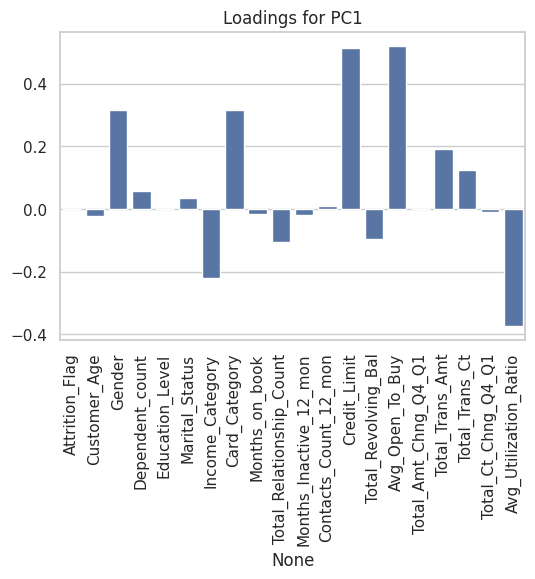

In [64]:
# Elijo un PC para visualizar, por ejemplo PC1
sns.barplot(x=loadings_df['PC1'].index, y=loadings_df['PC1'].values)
plt.xticks(rotation=90)  # Rotar etiquetas para mejor lectura
plt.title('Loadings for PC1')
plt.show()

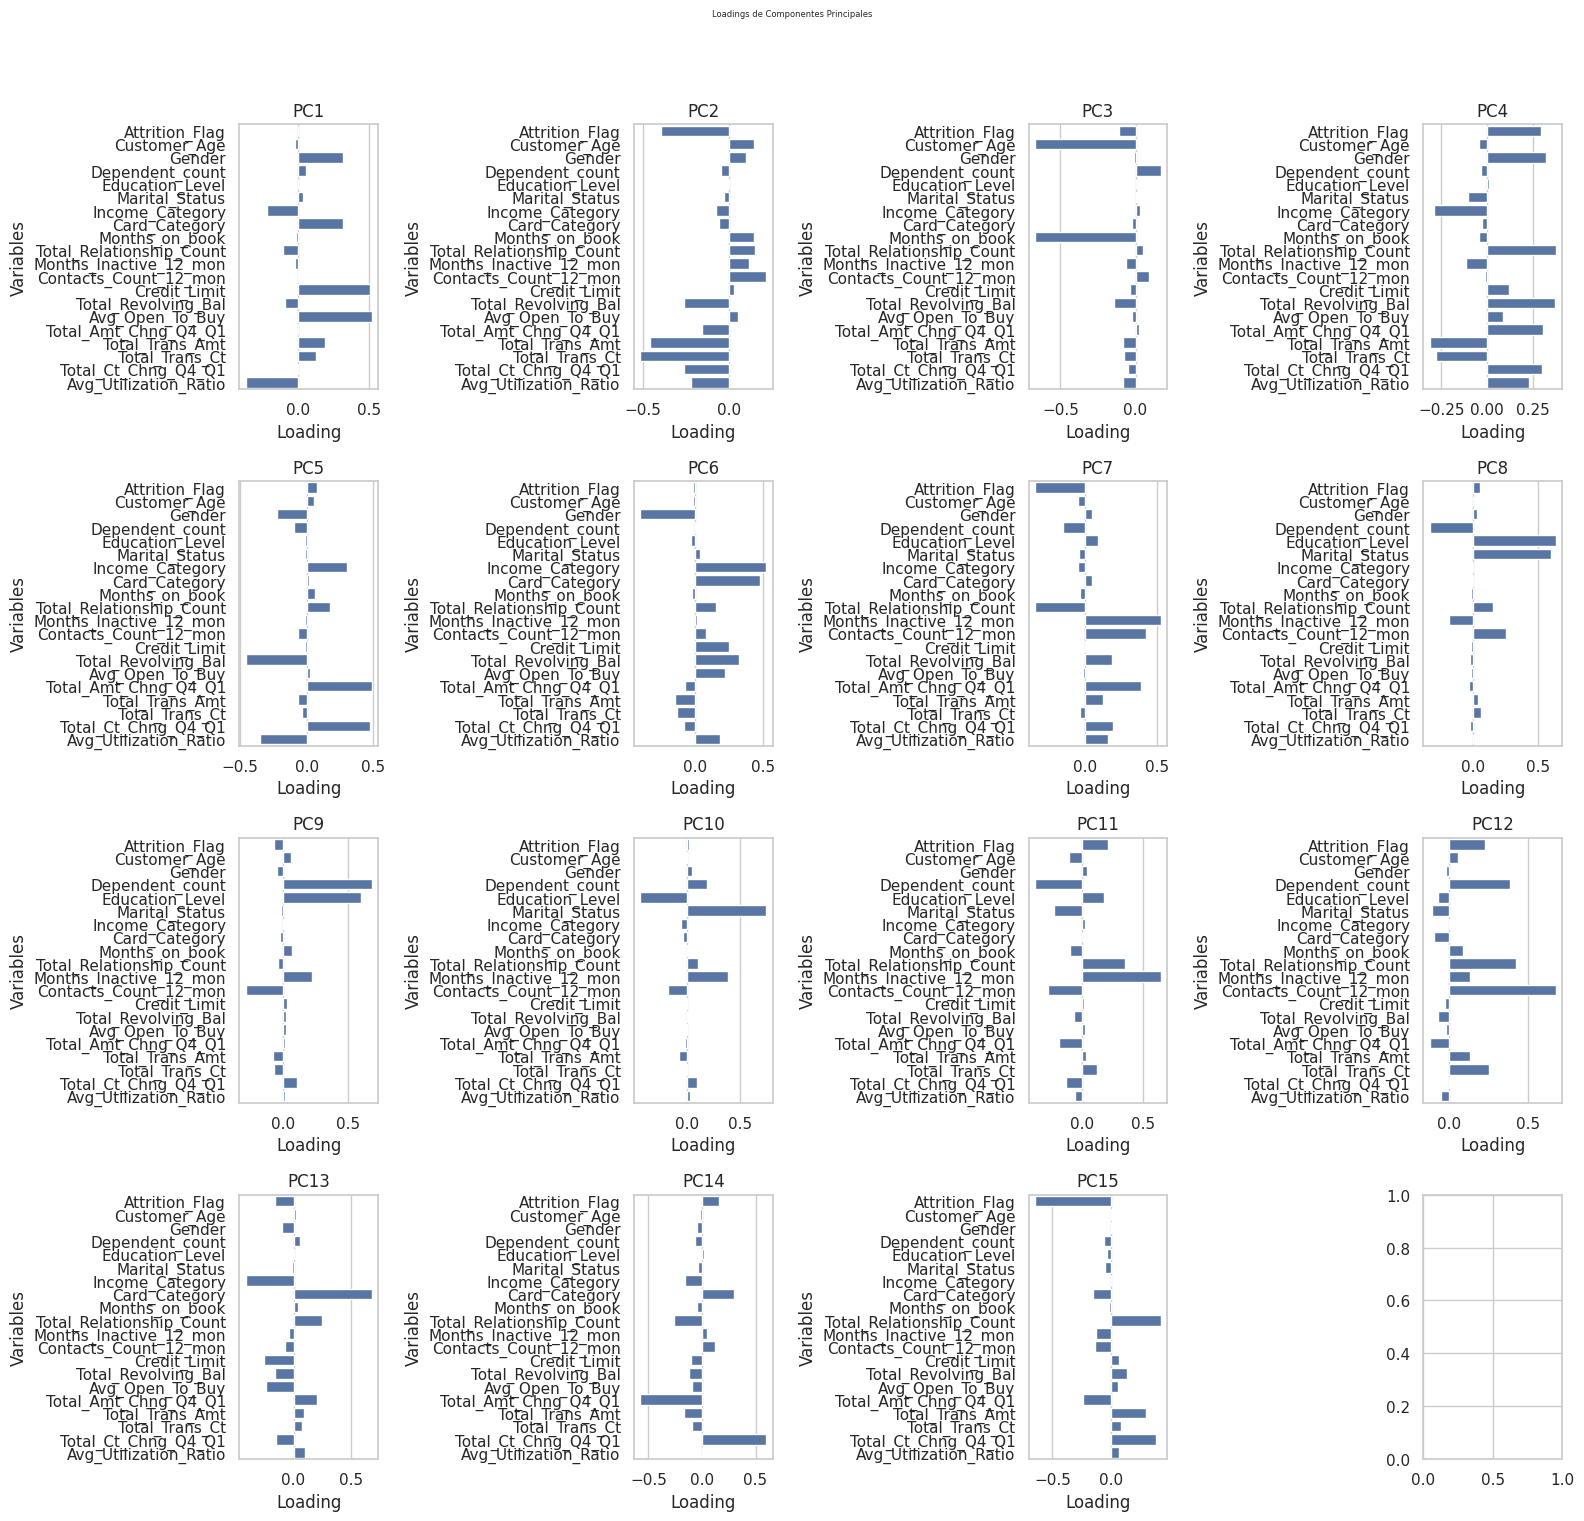

In [65]:
# Grafico la incidencia para cada PC
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Loadings de Componentes Principales', fontsize=6)

# Iterar sobre cada PC y graficar sus loadings
for i in range(15):
    row = i // 4  # Fila del subplot
    col = i % 4   # Columna del subplot
    sns.barplot(x=loadings_df[f'PC{i+1}'].values, y=loadings_df.index, ax=axes[row, col])
    axes[row, col].set_title(f'PC{i+1}')
    axes[row, col].set_ylabel('Variables')
    axes[row, col].set_xlabel('Loading')

# Ajustar espaciado entre subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Feature selection
Se selecciona un método de *feature selection* para reducir la dimensionalidad del dataset


### Forward selection

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargamos el conjunto de datos
# Defino un dataset con las columnas a evaluar
X = df_categoric_1.drop('Attrition_Flag', axis=1)  # Defino las características (X) excluyendo la variable objetivo
y = df_categoric_1['Attrition_Flag']               # Defino la variable objetivo (y)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
y_test

3781    1
2922    1
5070    1
7246    1
623     1
       ..
1937    1
4705    0
8548    1
1346    1
8802    1
Name: Attrition_Flag, Length: 2026, dtype: int64

In [68]:
# Obtener los nombres de las características o features
feature_names = X.columns.tolist()
feature_names

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [69]:
# Inicializamos una lista para almacenar las características seleccionadas
selected_features_fs = []

In [70]:
# Implementación de Forward Selection

# Mejor error inicialmente infinito
best_error = float('inf')

In [71]:
# Mientras queden características por seleccionar
while len(selected_features_fs) < len(X.columns) - 1:  # Menos uno porque excluimos la variable objetivo
    best_feature = None
        # Iterar sobre las características no seleccionadas
    for feature in X.columns:
        if feature not in selected_features_fs:
            # Añadir la característica al conjunto seleccionado
            candidate_features_fs = selected_features_fs + [feature]
            # Creamos un modelo de regresión lineal con las características candidatas
            model = LinearRegression()
            model.fit(X_train[candidate_features_fs], y_train)
            y_pred = model.predict(X_test[candidate_features_fs])
            error = mean_squared_error(y_test, y_pred)
            # Si el error es mejor que el mejor error encontrado hasta ahora, actualizamos
            if error < best_error:
                best_error = error
                best_feature = feature
    # Añadimos la mejor característica al conjunto seleccionado
    if best_feature is not None:
      # Añadimos la mejor característica al conjunto seleccionado
      selected_features_fs.append(best_feature)
      print("Feature added:", best_feature, "with error:", best_error)
    else:
      # Si no se encontró ninguna característica nueva que mejore el modelo, salimos del bucle
      break

print('El método forward selection seleccionó ', len(selected_features_fs), 'features o columnas')
print("Los features seleccionados son:", selected_features_fs)

Feature added: Total_Trans_Ct with error: 0.12045474489906649
Feature added: Total_Ct_Chng_Q4_Q1 with error: 0.11126712479635942
Feature added: Total_Revolving_Bal with error: 0.10385855452035268
Feature added: Total_Trans_Amt with error: 0.09599709389156659
Feature added: Total_Relationship_Count with error: 0.09235344362556852
Feature added: Contacts_Count_12_mon with error: 0.0904717513122798
Feature added: Months_Inactive_12_mon with error: 0.08902292520849857
Feature added: Marital_Status with error: 0.08851184163049955
Feature added: Gender with error: 0.08819245880091393
Feature added: Dependent_count with error: 0.08787772585039952
Feature added: Total_Amt_Chng_Q4_Q1 with error: 0.08783072078336726
Feature added: Months_on_book with error: 0.08777445613474585
Feature added: Card_Category with error: 0.08776983232631912
Feature added: Credit_Limit with error: 0.08776004766769442
Feature added: Income_Category with error: 0.08775746353391531
El método forward selection seleccionó

El forward selection seleccionó 15 features, igual numero de componentes principales que arrojó el PCA

In [72]:
# Creo un df con las features seleccionadas del forward selection y la variable target
df_categoric_selected_fs =df_categoric_1[['Attrition_Flag'] + selected_features_fs]
df_categoric_selected_fs.head(2)

,Attrition_Flag,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Trans_Amt,Total_Relationship_Count,Contacts_Count_12_mon,Months_Inactive_12_mon,Marital_Status,Gender,Dependent_count,Total_Amt_Chng_Q4_Q1,Months_on_book,Card_Category,Credit_Limit,Income_Category
0,1,42,1.625,777.0,1144,5,3,1,1,1,3,1.335,39.0,0,12691.0,2
1,1,33,3.714,864.0,1291,6,2,1,2,0,5,1.541,44.0,0,8256.0,4


In [73]:
# Hago una matriz de correlaciòn entre las variables seleccionadas del forward selection para reducir aùn màs la dimensionalidad
matriz_corr= df_categoric_selected_fs.corr().abs()
matriz_corr

,Attrition_Flag,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Trans_Amt,Total_Relationship_Count,Contacts_Count_12_mon,Months_Inactive_12_mon,Marital_Status,Gender,Dependent_count,Total_Amt_Chng_Q4_Q1,Months_on_book,Card_Category,Credit_Limit,Income_Category
Attrition_Flag,1.000000,0.371403,0.290054,0.263053,0.168598,0.150005,0.204491,0.152449,0.018597,0.037272,0.018991,0.131063,0.013687,0.006038,0.023873,0.017584
Total_Trans_Ct,0.371403,1.000000,0.112324,0.056060,0.807192,0.241891,0.152213,0.042787,0.075888,0.067454,0.049912,0.005469,0.049819,0.116579,0.075927,0.033498
Total_Ct_Chng_Q4_Q1,0.290054,0.112324,1.000000,0.089861,0.085581,0.040831,0.094997,0.038989,0.000258,0.005800,0.011087,0.384189,0.014072,0.004541,0.002020,0.014892
Total_Revolving_Bal,0.263053,0.056060,0.089861,1.000000,0.064370,0.013726,0.053913,0.042210,0.025386,0.029658,0.002688,0.058174,0.008623,0.017027,0.042493,0.025815
Total_Trans_Amt,0.168598,0.807192,0.085581,0.064370,1.000000,0.347229,0.112774,0.036982,0.044553,0.024890,0.025046,0.039678,0.038591,0.176377,0.171730,0.014686
Total_Relationship_Count,0.150005,0.241891,0.040831,0.013726,0.347229,1.000000,0.055203,0.003675,0.021393,0.003157,0.039076,0.050119,0.009203,0.073770,0.071386,0.008138
Contacts_Count_12_mon,0.204491,0.152213,0.094997,0.053913,0.112774,0.055203,1.000000,0.029493,0.001476,0.039987,0.040505,0.024445,0.010774,0.000919,0.020817,0.018367
Months_Inactive_12_mon,0.152449,0.042787,0.038989,0.042210,0.036982,0.003675,0.029493,1.000000,0.001709,0.011163,0.010768,0.032247,0.074164,0.016816,0.020394,0.024037
Marital_Status,0.018597,0.075888,0.000258,0.025386,0.044553,0.021393,0.001476,0.001709,1.000000,0.000007,0.000337,0.036210,0.012084,0.035947,0.031292,0.009659
Gender,0.037272,0.067454,0.005800,0.029658,0.024890,0.003157,0.039987,0.011163,0.000007,1.000000,0.004563,0.026712,0.006728,0.079203,0.420806,0.539731


<Axes: >

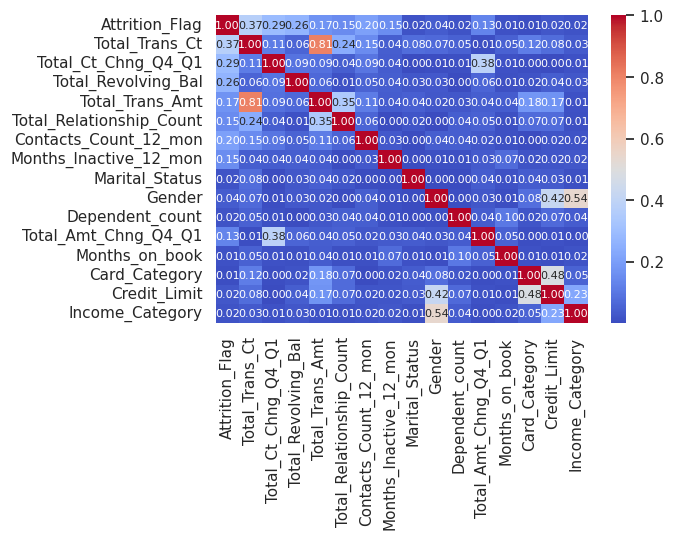

In [74]:
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})  # annot=True muestra los valores dentro del cuadrado, y el fmt los decimales

De la matriz de correlaciones, se observa que *Total_Trans_Amt* y *Total_Trans_Ct* están altamente correlacionadas. Elijo la mas correlacionada con la variable target (Attrition_Flag) y descarto la otra.

In [75]:
# Calcular la correlación entre las dos variables
corr_tr_am = df_categoric_1['Attrition_Flag'].corr((df_categoric_1['Total_Trans_Amt']).astype(int)) # lo convierto a int xq sino me da  AttributeError: 'float' object has no attribute 'shape'
corr_tr_ct = df_categoric_1['Attrition_Flag'].corr((df_categoric_1['Total_Trans_Ct']).astype(int))
print('Correlación entre Total_Trans_Amt y Attrition_Flag: ', round(corr_tr_am*100,2))
print('Correlación entre Total_Trans_Ct y Attrition_Flag: ', round(corr_tr_ct*100,2))

Correlación entre Total_Trans_Amt y Attrition_Flag:  16.86
Correlación entre Total_Trans_Ct y Attrition_Flag:  37.14


Siendo que Total_Trans_Ct está más correlacionada con Attrition_Flag, selecciono en el dataset y descarto Total_Trans_Amt

In [76]:
# Reformulo el df con sin tomar en cuenta Total_Trans_Amt
df_categoric_selected_fs_1= df_categoric_selected_fs.drop(columns=['Total_Trans_Amt'])
df_categoric_selected_fs_1.head(2)

,Attrition_Flag,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Relationship_Count,Contacts_Count_12_mon,Months_Inactive_12_mon,Marital_Status,Gender,Dependent_count,Total_Amt_Chng_Q4_Q1,Months_on_book,Card_Category,Credit_Limit,Income_Category
0,1,42,1.625,777.0,5,3,1,1,1,3,1.335,39.0,0,12691.0,2
1,1,33,3.714,864.0,6,2,1,2,0,5,1.541,44.0,0,8256.0,4


In [77]:
df_categoric_selected_fs_1.shape

(10127, 15)

Con esto, el dataset se reduce a la variable target (Attrition_Flag) y 14 features.

Ahora aplico otro método para evaluar el poder de predicción de cada variable.
### Regresión lineal para reducir dimensionalidad
Teniendo la variable target (Attrition_Flag), evalúo que variables del dataset (ya reducido en su dimensionalidad) la predicen mejor en base al R2.

In [78]:
# Hago un bucle para analizar varias columnas: que haga la regresión para varias variables
df_categoric_selected_fs_1.columns

Index(['Attrition_Flag', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Total_Revolving_Bal', 'Total_Relationship_Count',
       'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Marital_Status',
       'Gender', 'Dependent_count', 'Total_Amt_Chng_Q4_Q1', 'Months_on_book',
       'Card_Category', 'Credit_Limit', 'Income_Category'],
      dtype='object')

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

columnas= df_categoric_selected_fs_1.columns.drop('Attrition_Flag')     # Creo una lista de columnas para explicar la etiqueta 'Survived', elimiandno la target
lista_r2=[]   # Creo una lista vacía donde guardar los r2, las pendiente sy los interceptos
lista_pendientes=[]
lista_interceptos=[]

for columna in columnas:
   x_reg = np.array(df_categoric_selected_fs_1[columna]).reshape(-1,1)     # Set de variables para predecir
   y_reg = np.array(df_categoric_selected_fs_1['Attrition_Flag']).reshape(-1,1)  # Defino variable target, que es siempre la misma (predecir si sobrevive de acuerdo a la columna)
   # Creo el modelo de regresion
   modelo_linreg_colum = LinearRegression()
   # Separo set de entrenamiento y test
   x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)
   # Entreno el modelo
   modelo_linreg_colum.fit(x_reg,y_reg)
   # Obtengo los coeficientes del modelo
   intercepto= modelo_linreg_colum.intercept_.round(4)
   pendiente= modelo_linreg_colum.coef_[0].round(4)
   # Predecir para nuevos valores
   y_reg_pred_colum= modelo_linreg_colum.predict(x_reg_test)
   r2 = r2_score(y_reg_test, y_reg_pred_colum)

   lista_r2.append(r2)                        # va guardando el resultado de los r2 en la lista
   lista_pendientes.append(pendiente)         # va guardando el resultado de los coeficientes en la lista
   lista_interceptos.append(intercepto)       # va guardando el resultado de los interceptos en la lista
# Imprimo la
print('R2=', lista_r2)
print('Coeficientes=', lista_pendientes)
print('Interceptos=', lista_interceptos)

R2= [0.11059040654643393, 0.08673238749931722, 0.06860855203034188, 0.021443259436637385, 0.03073923010217472, 0.018245224846267782, 0.0018273586944913545, -0.00161638936151709, 0.00012187457683499048, 0.019764338464578812, -0.0007567468599296578, -0.00023123896809895683, 0.00045869377085783203, -0.0011369790976640815]
Coeficientes= [array([0.0058]), array([0.4474]), array([0.0001]), array([0.0354]), array([-0.0679]), array([-0.0554]), array([-0.0093]), array([0.0274]), array([-0.0054]), array([0.2196]), array([-0.0006]), array([0.0032]), array([0.]), array([-0.0043])]
Interceptos= [array([0.4625]), array([0.5207]), array([0.7015]), array([0.7042]), array([1.006]), array([0.969]), array([0.8529]), array([0.8264]), array([0.8519]), array([0.6725]), array([0.862]), array([0.8388]), array([0.831]), array([0.8516])]


In [80]:
# Creo un DataFrame para visualizar los resultados por feature
resultados = pd.DataFrame({
    'Variable': columnas,
    'R2': lista_r2,
    'Coeficientes': lista_pendientes,
    'Interceptos': lista_interceptos
})
# Ordenar los resultados por R2 en orden descendente
resultados_ordenados_r2 = resultados.sort_values(by='R2', ascending=False)
resultados_ordenados_coef = resultados.sort_values(by='Coeficientes', ascending=False)

print("Resultados de Regresión Lineal Ordenados por R2")
print(resultados_ordenados_r2)
print("Resultados de Regresión Lineal Ordenados por valor coeficiente")
print(resultados_ordenados_coef)
print ("Intercepto_clase=",'--> Valor de x cuando x=0')
print ("Coeficiente_clase=", '--> Pendiente. Valores cercanos a cero implican menor poder de predicción')

Resultados de Regresión Lineal Ordenados por R2
                    Variable        R2 Coeficientes Interceptos
0             Total_Trans_Ct  0.110590     [0.0058]    [0.4625]
1        Total_Ct_Chng_Q4_Q1  0.086732     [0.4474]    [0.5207]
2        Total_Revolving_Bal  0.068609     [0.0001]    [0.7015]
4      Contacts_Count_12_mon  0.030739    [-0.0679]     [1.006]
3   Total_Relationship_Count  0.021443     [0.0354]    [0.7042]
9       Total_Amt_Chng_Q4_Q1  0.019764     [0.2196]    [0.6725]
5     Months_Inactive_12_mon  0.018245    [-0.0554]     [0.969]
6             Marital_Status  0.001827    [-0.0093]    [0.8529]
12              Credit_Limit  0.000459        [0.0]     [0.831]
8            Dependent_count  0.000122    [-0.0054]    [0.8519]
11             Card_Category -0.000231     [0.0032]    [0.8388]
10            Months_on_book -0.000757    [-0.0006]     [0.862]
13           Income_Category -0.001137    [-0.0043]    [0.8516]
7                     Gender -0.001616     [0.0274]    [

Todas las variables muestran un r2 bajo y pendientes poco significativas y, por tanto, baja capacidad explcativa de la variable target . No obstante, elijo las de mayor r2 y coeficientes:

Total_Trans_Ct / Total_Amt_Chng_Q4_Q1 / Total_Ct_Chng_Q4_Q1 / Total_Revolving_Bal.

**Total_Ct_Chng_Q4_Q1** es la variable con mayor r2 y mayor coeficiente.


---


📌Aclaración: Podria usar un umbral o benchmark para definir en un codigo que se elijan las variables con r2 > x. Lo mismo con el coeficiente. Pero son tan poco significativos, que los elegí manualmente, seleccionando los tres mayores r2 y los coef > 0.1

In [81]:
# Armo el dataframe con las columnas seleccionadas
selected_features_final= df_categoric_selected_fs_1[['Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal']]
# Armo una lista a partir de los nombres de las columnas
selected_features_final_list= selected_features_final.columns.tolist()
# Construyo el nuevo df
df_categoric_selected_fs_2 = df_categoric_selected_fs_1[['Attrition_Flag'] + selected_features_final_list]
df_categoric_selected_fs_2['Attrition_Flag'] = df_categoric_selected_fs_2['Attrition_Flag'].astype(int)
df_categoric_selected_fs_2.head(2)

<ipython-input-81-d52720faae0c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categoric_selected_fs_2['Attrition_Flag'] = df_categoric_selected_fs_2['Attrition_Flag'].astype(int)


,Attrition_Flag,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal
0,1,42,1.335,1.625,777.0
1,1,33,1.541,3.714,864.0


In [82]:
df_categoric_selected_fs_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Attrition_Flag        10127 non-null  int64  
 1   Total_Trans_Ct        10127 non-null  Int64  
 2   Total_Amt_Chng_Q4_Q1  10127 non-null  float64
 3   Total_Ct_Chng_Q4_Q1   10127 non-null  float64
 4   Total_Revolving_Bal   10127 non-null  float64
dtypes: Int64(1), float64(3), int64(1)
memory usage: 405.6 KB


# MODELADO



## APRENDIZAJE SUPERVISADO

### REGRESION LOGÍSTICA
Método para problemas de clasificación, donde se obtiene un valor binario entre 0 y 1 que puede asociarse a una categoría

En este caso, la variable 'Attrition_Flag' es una variable categórica binaria, indicando:
*   0 = el cliente extinguió la relación comercial con la tarjeta -*Attrieted customer*- (TRUE)
*   1 = el cliente continua vigente -*Existing customer*- (FALSE).



  

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Seleccionar características y etiqueta
features = ['Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal'] # Aca solo indico las columnas a tomar en cuenta. No pongo el df xq sino da error de tipo de datos (espera un booleano)
X = df_categoric_selected_fs_2[features]
y = df_categoric_selected_fs_2['Attrition_Flag']

# Dividir los datos en conjuntos de entrenamiento(80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
modelo = LogisticRegression(max_iter=500)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predecir etiquetas/valores para el conjunto de prueba
y_pred = modelo.predict(X_test)  # guardo en y_pred los valores predichos de y con los valores de x_test


Se aplica el modelo de regresion logistica para predecir si un cliente abandonara o no la relacion comercial en base a las caracteristicas: 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal'.

Accuracy del modelo: 88.5 % total de elementos clasificados correctamente
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.74      0.45      0.56       327
           1       0.90      0.97      0.93      1699

    accuracy                           0.88      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.87      0.88      0.87      2026

Precision positiva = 90.1 % de casos positivos detectados correctamente
Precision negativa= 73.74 % de casos negativos detectados correctamente
Sensibilidad o Tasa de Verdaderos Positivos (recall positivo): 96.94 % - proporción de casos positivos que fueron correctamente identificados
Especificidad - Tasa de Verdaderos Negativos (recall negativo): 44.65 % - proporción de casos negativos que fueron correctamente identificados
Matriz de Confusión:
 [[ 146  181]
 [  52 1647]]


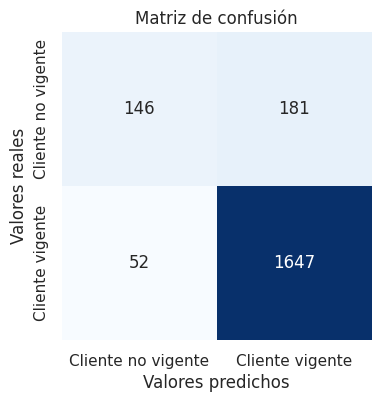

In [84]:
# Evaluar el modelo
accuracy= round(accuracy_score(y_test, y_pred)*100,2)
precision_positiva = round(metrics.precision_score(y_test, y_pred, pos_label=1)*100,2)
precision_negativa = round(metrics.precision_score(y_test, y_pred, pos_label=0)*100,2)
recall_sensibilidad = round(metrics.recall_score(y_test, y_pred, pos_label=1)*100,2)
recall_especificidad= round(metrics.recall_score(y_test, y_pred, pos_label=0)*100, 2)
print("Accuracy del modelo:", accuracy, '% total de elementos clasificados correctamente')
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred)) # \n acomoda los copetes de las columnas
print('Precision positiva =', precision_positiva, '% de casos positivos detectados correctamente')
print('Precision negativa=', precision_negativa, '% de casos negativos detectados correctamente')
print('Sensibilidad o Tasa de Verdaderos Positivos (recall positivo):', recall_sensibilidad, '% - proporción de casos positivos que fueron correctamente identificados')
print('Especificidad - Tasa de Verdaderos Negativos (recall negativo):', recall_especificidad, '% - proporción de casos negativos que fueron correctamente identificados')
conf_matriz= confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matriz)  # Acá calcula la matriz pero no la grafica

# Grafico la matriz de confusión
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matriz, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.xticks([0.5, 1.5], ['Cliente no vigente', 'Cliente vigente'])
plt.yticks([0.5, 1.5], ['Cliente no vigente', 'Cliente vigente'])
plt.show()

## Prueba del modelo sin los outliers

### Cálculo de los outliers para el set de features seleccioandas

In [86]:
print(df_categoric_selected_fs_2.shape)
df_categoric_selected_fs_2.head(2)

(10127, 5)


,Attrition_Flag,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal
0,1,42,1.335,1.625,777.0
1,1,33,1.541,3.714,864.0


In [87]:
# Defino un dataframe con los outliers

# 1) Defino el rango intercoartil (IQR) de las variables
Q1_Tot_Trans_Ct= df_categoric_selected_fs_2["Total_Trans_Ct"].quantile(0.25)
Q3_Tot_Trans_Ct= df_categoric_selected_fs_2["Total_Trans_Ct"].quantile(0.75)

Q1_tot_amt_ch= df_categoric_selected_fs_2["Total_Amt_Chng_Q4_Q1"].quantile(0.25)
Q3_tot_amt_ch= df_categoric_selected_fs_2["Total_Amt_Chng_Q4_Q1"].quantile(0.75)

Q1_tot_ct_ch= df_categoric_selected_fs_2["Total_Ct_Chng_Q4_Q1"].quantile(0.25)
Q3_tot_ct_ch= df_categoric_selected_fs_2["Total_Ct_Chng_Q4_Q1"].quantile(0.75)

Q1_revolving_1= df_categoric_selected_fs_2["Total_Revolving_Bal"].quantile(0.25)
Q3_revolving_1= df_categoric_selected_fs_2["Total_Revolving_Bal"].quantile(0.75)

IQR_Tot_Trans_Ct = Q3_Tot_Trans_Ct - Q1_Tot_Trans_Ct
IQR_tot_amt_ch = Q3_tot_amt_ch - Q1_tot_amt_ch
IQR_tot_ct_ch = Q3_tot_ct_ch - Q1_tot_ct_ch
IQR_revolving_1 = Q3_revolving_1 - Q1_revolving_1

# 2) Calculo los límites
lim_inf_Tot_Trans_Ct= Q1_Tot_Trans_Ct - 1.5 *IQR_Tot_Trans_Ct
lim_sup_Tot_Trans_Ct= Q3_Tot_Trans_Ct + 1.5 *IQR_Tot_Trans_Ct

lim_inf_tot_amt_ch= Q1_tot_amt_ch - 1.5 *IQR_tot_amt_ch
lim_sup_tot_amt_ch= Q3_tot_amt_ch + 1.5 *IQR_tot_amt_ch

lim_inf_tot_ct_ch= Q1_tot_ct_ch - 1.5 *IQR_tot_ct_ch
lim_sup_tot_ct_ch= Q3_tot_ct_ch + 1.5 *IQR_tot_ct_ch

lim_inf_revolving_1= Q1_revolving_1 - 1.5 * IQR_revolving_1
lim_sup_revolving_1= Q3_revolving_1 + 1.5* IQR_revolving_1

# 3) Armo el dataframe
df_outliers_1= df_categoric_selected_fs_2[
    ((df_categoric_selected_fs_2["Total_Trans_Ct"]<lim_inf_Tot_Trans_Ct) | (df_categoric_selected_fs_2["Total_Trans_Ct"]>lim_sup_Tot_Trans_Ct)) |
    ((df_categoric_selected_fs_2["Total_Amt_Chng_Q4_Q1"]<lim_inf_tot_amt_ch) | (df_categoric_selected_fs_2["Total_Amt_Chng_Q4_Q1"]>lim_sup_tot_amt_ch)) |
    ((df_categoric_selected_fs_2["Total_Ct_Chng_Q4_Q1"]<lim_inf_tot_ct_ch) | (df_categoric_selected_fs_2["Total_Ct_Chng_Q4_Q1"]>lim_sup_tot_ct_ch)) |
    ((df_categoric_selected_fs_2["Total_Revolving_Bal"]<lim_inf_revolving_1) | (df_categoric_selected_fs_2["Total_Revolving_Bal"]>lim_sup_revolving_1))
    ]

print('Formato del nuevo df: ', df_outliers_1.shape)
df_outliers_1.head(2)

Formato del nuevo df:  (682, 5)


,Attrition_Flag,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal
0,1,42,1.335,1.625,777.0
1,1,33,1.541,3.714,864.0


Se vuelve a aplicar el modelo de regresión logística al df sin outliers para predecir si un cliente abandonara o no la relacion comercial en base a las caracteristicas: 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal'.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Seleccionar características y etiqueta
features = ['Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal'] # Aca solo indico las columnas a tomar en cuenta. No pongo el df xq sino da error de tipo de datos (espera un booleano)
X_out = df_outliers_1[features]
y_out = df_outliers_1['Attrition_Flag']

# Dividir los datos en conjuntos de entrenamiento(80%) y prueba (20%)
X_out_train, X_out_test, y_out_train, y_out_test = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
modelo_out = LogisticRegression(max_iter=500)

# Entrenar el modelo
modelo_out.fit(X_out_train, y_out_train)

# Predecir etiquetas/valores para el conjunto de prueba
y_out_pred = modelo_out.predict(X_out_test)  # guardo en y_pred los valores predichos de y con los valores de x_test


In [89]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [90]:
y_pred.shape

(2026,)

Accuracy del modelo sin outliers: 93.43 % total de elementos clasificados correctamente
Reporte de Clasificación modelo sin outliers:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.97      0.96      0.96       118

    accuracy                           0.93       137
   macro avg       0.86      0.87      0.87       137
weighted avg       0.94      0.93      0.94       137

Precision positiva modelo sin outliers= 96.58 % de casos positivos detectados correctamente
Precision negativa modelo sin outliers= 75.0 % de casos negativos detectados correctamente
Sensibilidad o Tasa de Verdaderos Positivos (recall positivo) modelo sin outliers: 95.76 % - proporción de casos positivos que fueron correctamente identificados
Especificidad - Tasa de Verdaderos Negativos (recall negativo) modelo sin outliers: 78.95 % - proporción de casos negativos que fueron correctamente identificados
Matriz de Confusión modelo sin

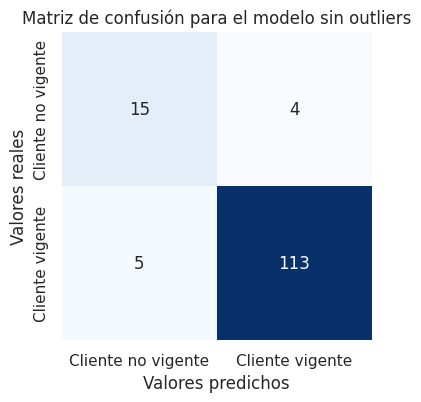

In [91]:
# Evaluar el modelo
accuracy_out= round(accuracy_score(y_out_test, y_out_pred)*100,2)   # Otra forma de calcularla es modelo_out.score(X_out_test, y_out_test)
precision_positiva_out = round(metrics.precision_score(y_out_test, y_out_pred, pos_label=1)*100,2)
precision_negativa_out = round(metrics.precision_score(y_out_test, y_out_pred, pos_label=0)*100,2)
recall_sensibilidad_out = round(metrics.recall_score(y_out_test, y_out_pred, pos_label=1)*100,2)
recall_especificidad_out= round(metrics.recall_score(y_out_test, y_out_pred, pos_label=0)*100, 2)
print("Accuracy del modelo sin outliers:", accuracy_out, '% total de elementos clasificados correctamente')
print("Reporte de Clasificación modelo sin outliers:\n", classification_report(y_out_test, y_out_pred)) # \n acomoda los copetes de las columnas
print('Precision positiva modelo sin outliers=', precision_positiva_out, '% de casos positivos detectados correctamente')
print('Precision negativa modelo sin outliers=', precision_negativa_out, '% de casos negativos detectados correctamente')
print('Sensibilidad o Tasa de Verdaderos Positivos (recall positivo) modelo sin outliers:', recall_sensibilidad_out, '% - proporción de casos positivos que fueron correctamente identificados')
print('Especificidad - Tasa de Verdaderos Negativos (recall negativo) modelo sin outliers:', recall_especificidad_out, '% - proporción de casos negativos que fueron correctamente identificados')
conf_matriz_out= confusion_matrix(y_out_test, y_out_pred)
print("Matriz de Confusión modelo sin outliers:\n", conf_matriz_out)  # Acá calcula la matriz pero no la grafica

# Grafico la matriz de confusión
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matriz_out, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión para el modelo sin outliers')
plt.xticks([0.5, 1.5], ['Cliente no vigente', 'Cliente vigente'])
plt.yticks([0.5, 1.5], ['Cliente no vigente', 'Cliente vigente'])
plt.show()

Aplico otro modelo se clasificación ▶
## Naive Bayes

Cre un modelo de clasificación utilizando el algoritmo de Naive Bayes con una variable objetivo categórica y variables predictoras numéricas continuas --> la versión del clasificador Naive Bayes más apropiada es GaussianNB, ya que asume que las características siguen una distribución normal.

In [93]:
df_outliers_1.head(2)

,Attrition_Flag,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal
0,1,42,1.335,1.625,777.0
1,1,33,1.541,3.714,864.0


In [94]:
import pandas as pd
# Convierto la columna booleana en una numérica (1 para True y 0 para False)
df_outliers_1['Attrition_Flag'] = df_outliers_1['Attrition_Flag'].astype(int)
# Verifico los cambios
print(df_outliers_1['Attrition_Flag'].unique())
print(df_outliers_1.head(2))

[1 0]
   Attrition_Flag  Total_Trans_Ct  Total_Amt_Chng_Q4_Q1  Total_Ct_Chng_Q4_Q1  \
0               1              42                 1.335                1.625   
1               1              33                 1.541                3.714   

   Total_Revolving_Bal  
0                777.0  
1                864.0  


<ipython-input-94-ad430911d9d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_1['Attrition_Flag'] = df_outliers_1['Attrition_Flag'].astype(int)


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Separo las variables independientes y la variable objetivo
X_nb = df_outliers_1[['Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal']]
y_nb = df_outliers_1['Attrition_Flag']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)

# Instancio el modelo clasificador Gausiano
model_nb = GaussianNB()

# Entreno el modelo con el conjunto de datos de entrenamiento
model_nb.fit(X_nb_train, y_nb_train)

GaussianNB()

In [96]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8101, 4) (8101,)
(2026, 4) (2026,)


In [97]:
# Predecir las etiquetas para el conjunto de datos de prueba
y_nb_pred = model_nb.predict(X_nb_test)
# Verificar los valores únicos de las predicciones
print("Valores únicos en y_nb_pred:", np.unique(y_nb_pred))
# Comparo los valores reales con los predichos
print("Valor real:", y_nb_test[6])
print("Valor predicho:", y_nb_pred[0])

Valores únicos en y_nb_pred: [0 1]
Valor real: 1
Valor predicho: 1


In [98]:
# Calcular la precisión del modelo
accuracy_nb = accuracy_score(y_nb_test, y_nb_pred)
print(f'Precisión del modelo Naive Bayes: {accuracy_nb:.2f}')

# Mostrar un reporte del modelo de clasificación
print('Reporte del modelo de clasificación:\n', classification_report(y_nb_test, y_nb_pred))


Precisión del modelo Naive Bayes: 0.93
Reporte del modelo de clasificación:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.97      0.95      0.96       118

    accuracy                           0.93       137
   macro avg       0.85      0.90      0.87       137
weighted avg       0.94      0.93      0.94       137



El modelo de Naive Bayes muestra una precisión alta (93%), igual al de regresón logística (sin outliers). Los niveles de precisón son similares.

Con este modelo la sensibilidad (recall positivo) se mantiene igual, pero mejora la especificidad (la eficacia de la predicción de la clase negativa sube de 79% a 84%).

❗ Por tanto, debería usarse este modelo para predecir❗

# CONCLUSIONES

Las variables más apropiadas para predecir si un cliente se dará de de baja de la relación comercial con la tarjeta son: 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal'.

El modelo más apropiado para predecir es el de clasificación **Naive Bayes**, con una precisión alta (93%), sin tomar en cuenta los outliers.
